2025-02-02 15:34:17.630121
Epoch 1/5000
1/1 - 3s - loss: 0.6236 - mae: 0.7019 - 3s/epoch - 3s/step
Epoch 2/5000
1/1 - 0s - loss: 0.6222 - mae: 0.7014 - 37ms/epoch - 37ms/step
Epoch 3/5000
1/1 - 0s - loss: 0.6208 - mae: 0.7010 - 39ms/epoch - 39ms/step
Epoch 4/5000
1/1 - 0s - loss: 0.6194 - mae: 0.7005 - 39ms/epoch - 39ms/step
Epoch 5/5000
1/1 - 0s - loss: 0.6182 - mae: 0.7001 - 41ms/epoch - 41ms/step
Epoch 6/5000
1/1 - 0s - loss: 0.6169 - mae: 0.6997 - 39ms/epoch - 39ms/step
Epoch 7/5000
1/1 - 0s - loss: 0.6158 - mae: 0.6993 - 39ms/epoch - 39ms/step
Epoch 8/5000
1/1 - 0s - loss: 0.6146 - mae: 0.6990 - 37ms/epoch - 37ms/step
Epoch 9/5000
1/1 - 0s - loss: 0.6135 - mae: 0.6987 - 38ms/epoch - 38ms/step
Epoch 10/5000
1/1 - 0s - loss: 0.6124 - mae: 0.6983 - 40ms/epoch - 40ms/step
Epoch 11/5000
1/1 - 0s - loss: 0.6114 - mae: 0.6980 - 37ms/epoch - 37ms/step
Epoch 12/5000
1/1 - 0s - loss: 0.6104 - mae: 0.6976 - 39ms/epoch - 39ms/step
Epoch 13/5000
1/1 - 0s - loss: 0.6094 - mae: 0.6973 - 38ms/epo

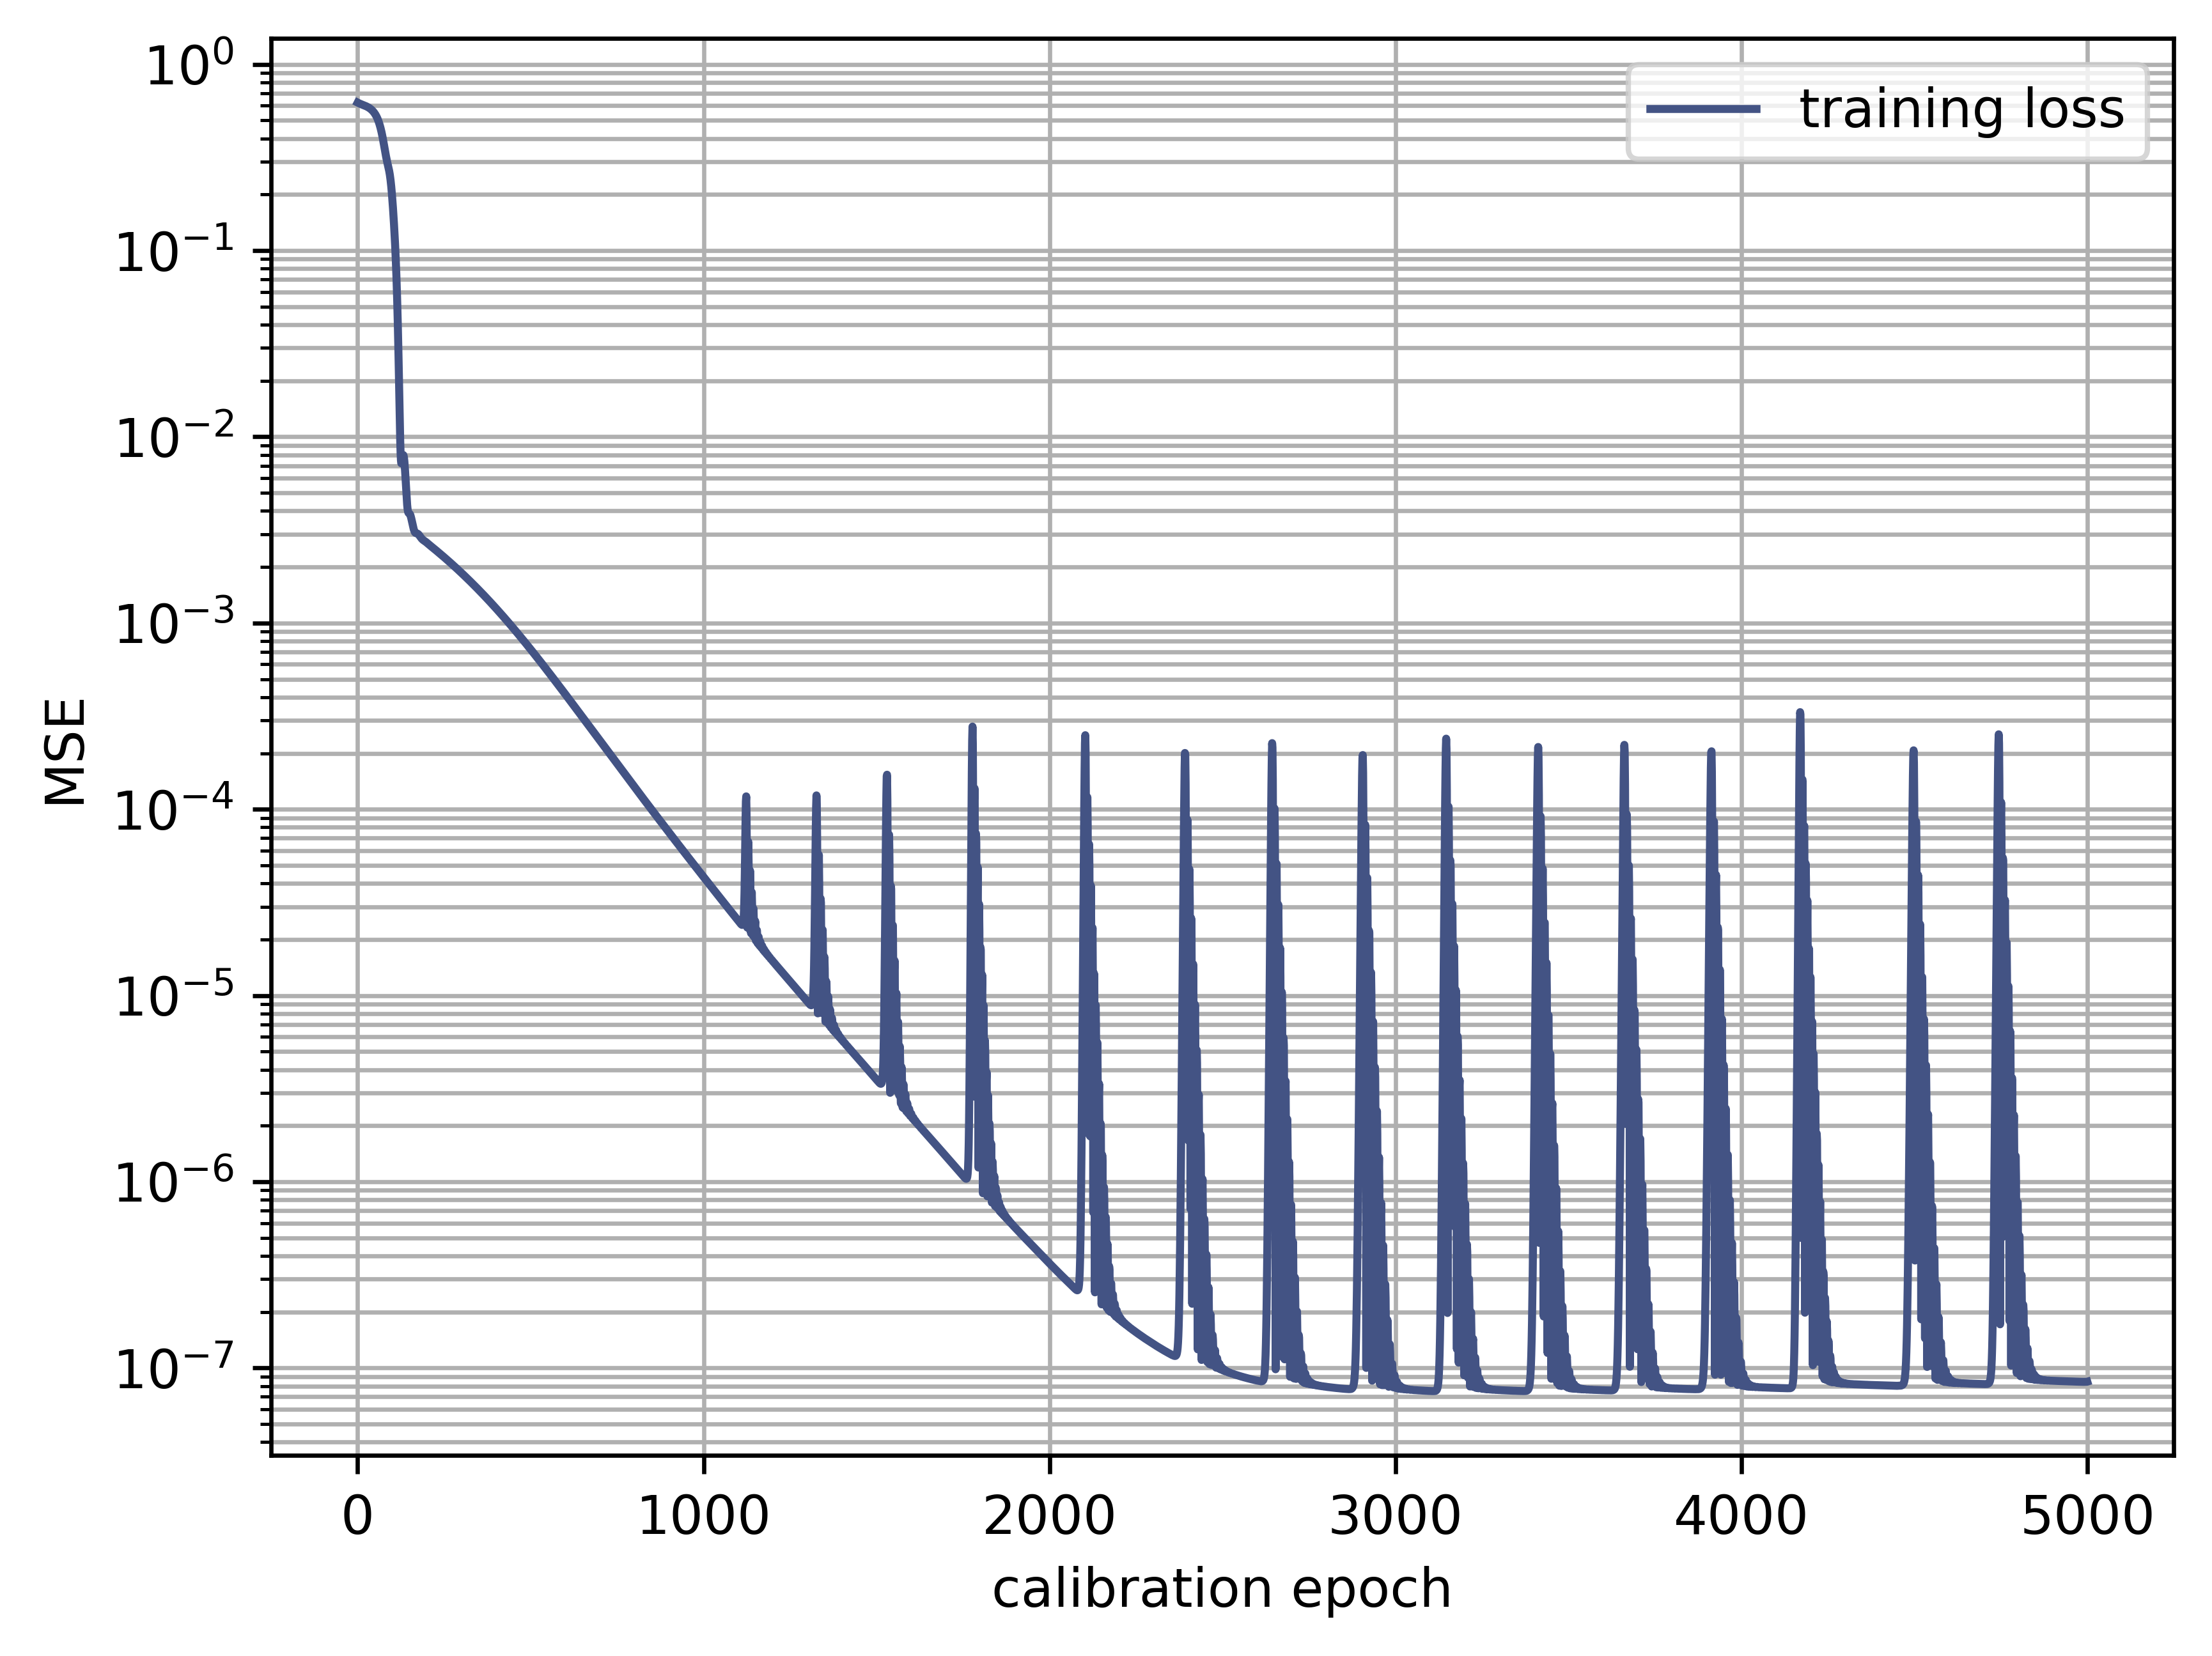

In [1]:
"""
Tutorial Machine Learning in Solid Mechanics (WiSe 23/24)
Task 4: Viscoelasticity
==================
Authors: Dominik K. Klein
         
01/2024
"""


# %%   
"""
Import modules

"""
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

# %% Own modules
import data as ld
import plots as lp
import gsm as hc2


# %%   
"""
Load and visualize data

"""


E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1]
As = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

#lp.plot_data(eps, eps_dot, sig, omegas, As)



# %%   
"""
Load and evaluate model

"""

model2 = hc2.main()
t1 = now()
print(t1)

h = model2.fit([eps, dts], [sig], epochs = 5000,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()




1/1 [==============================] - 0s 316ms/step


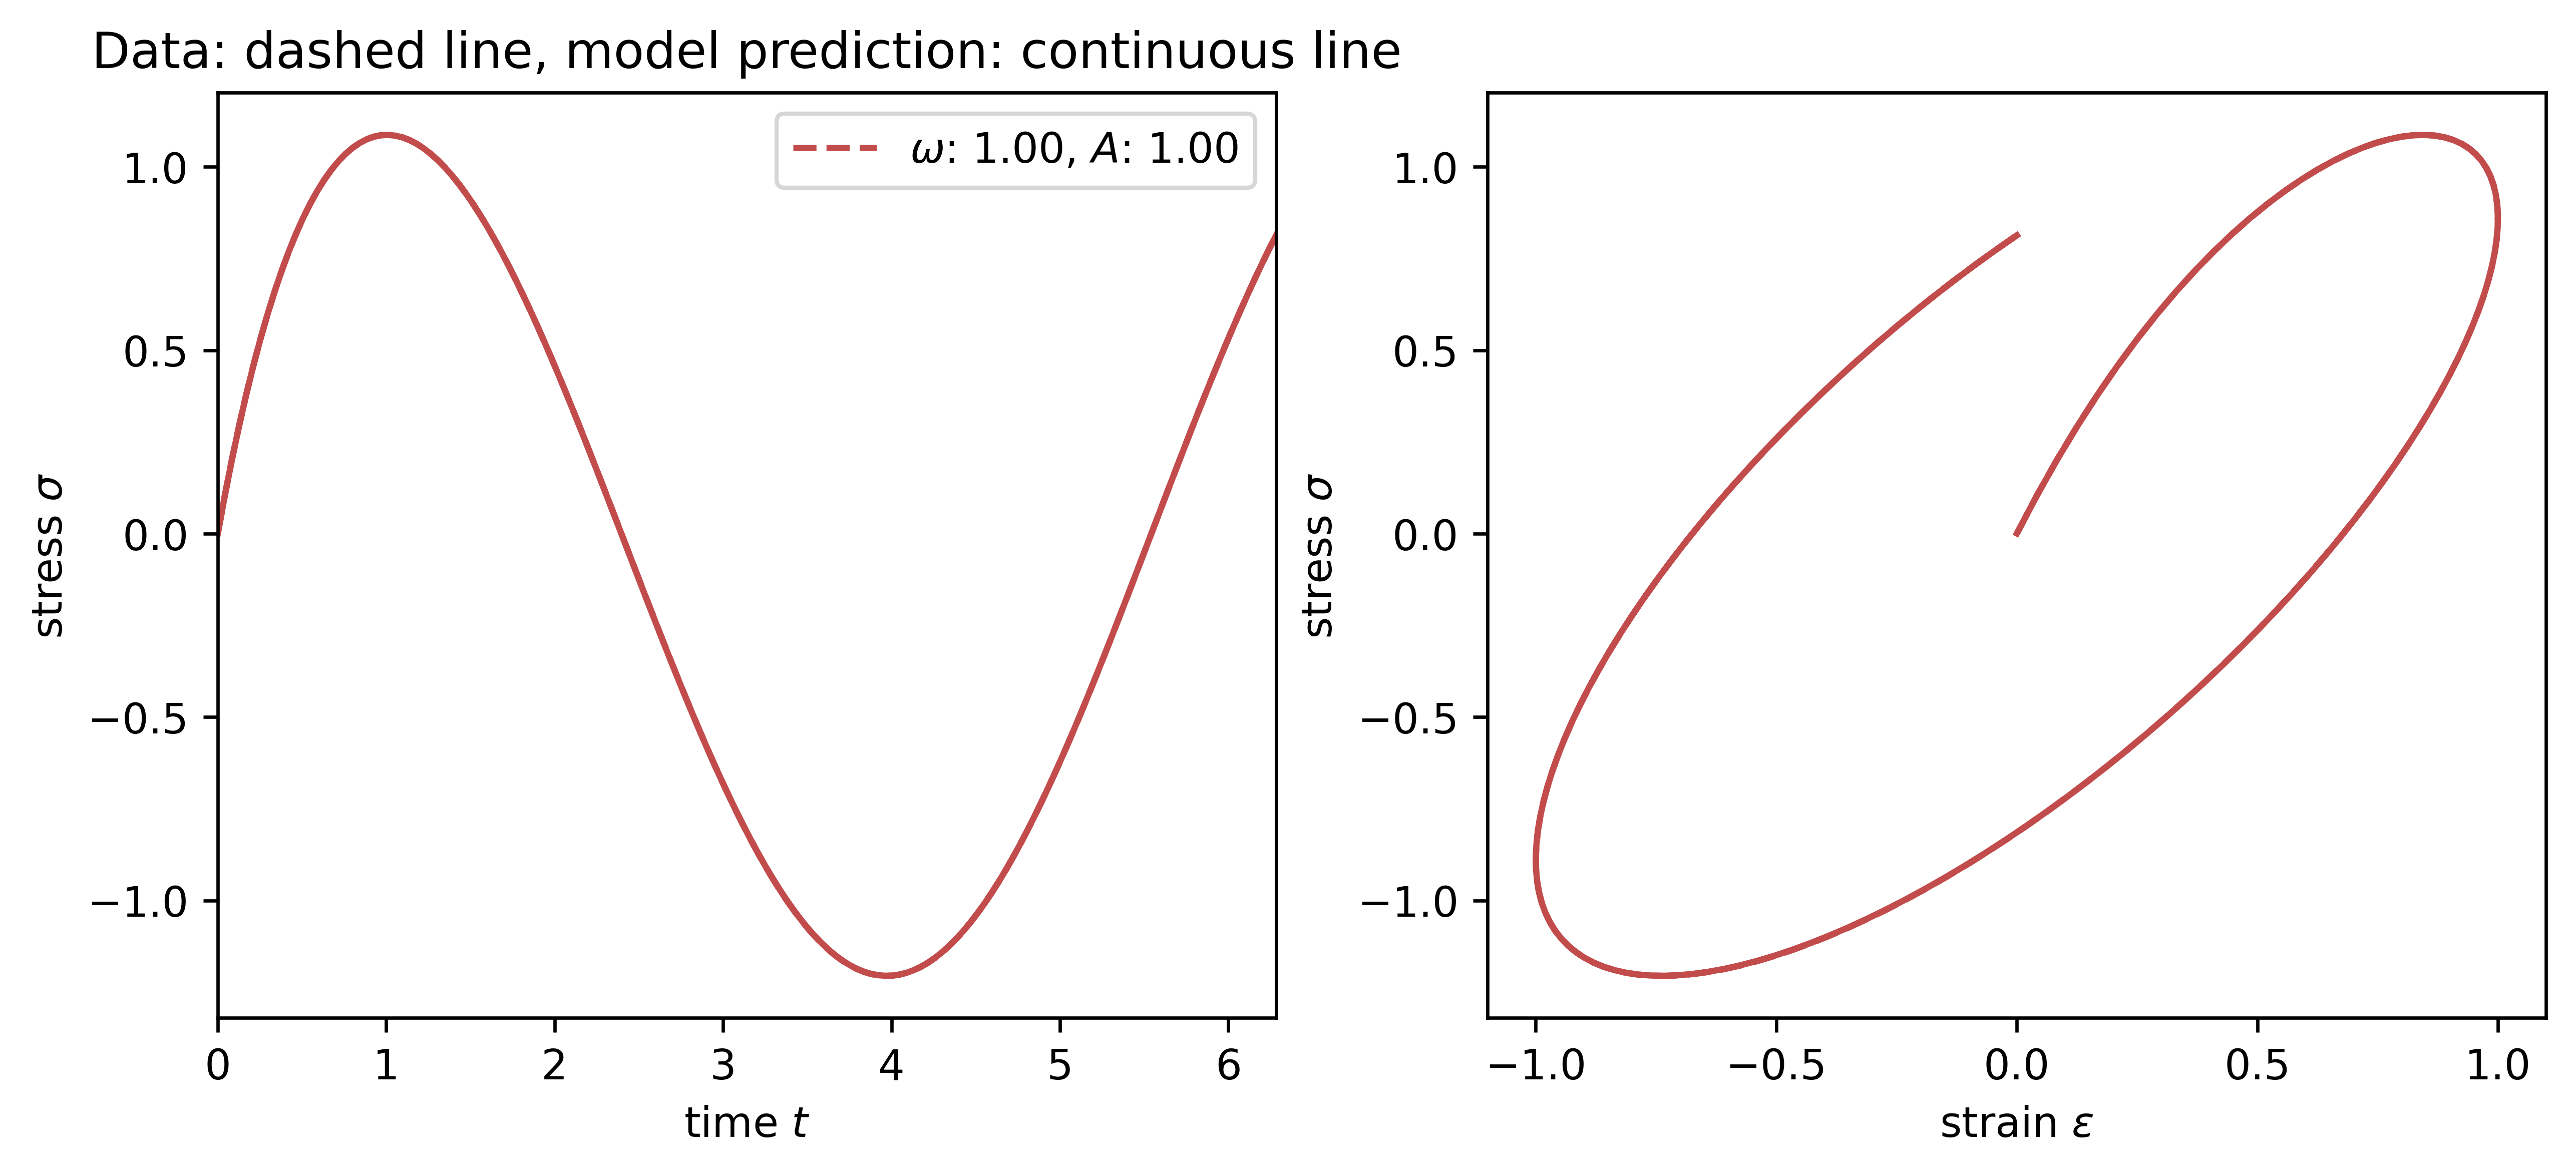

In [2]:
n = 150
eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


1/1 [==============================] - 0s 24ms/step


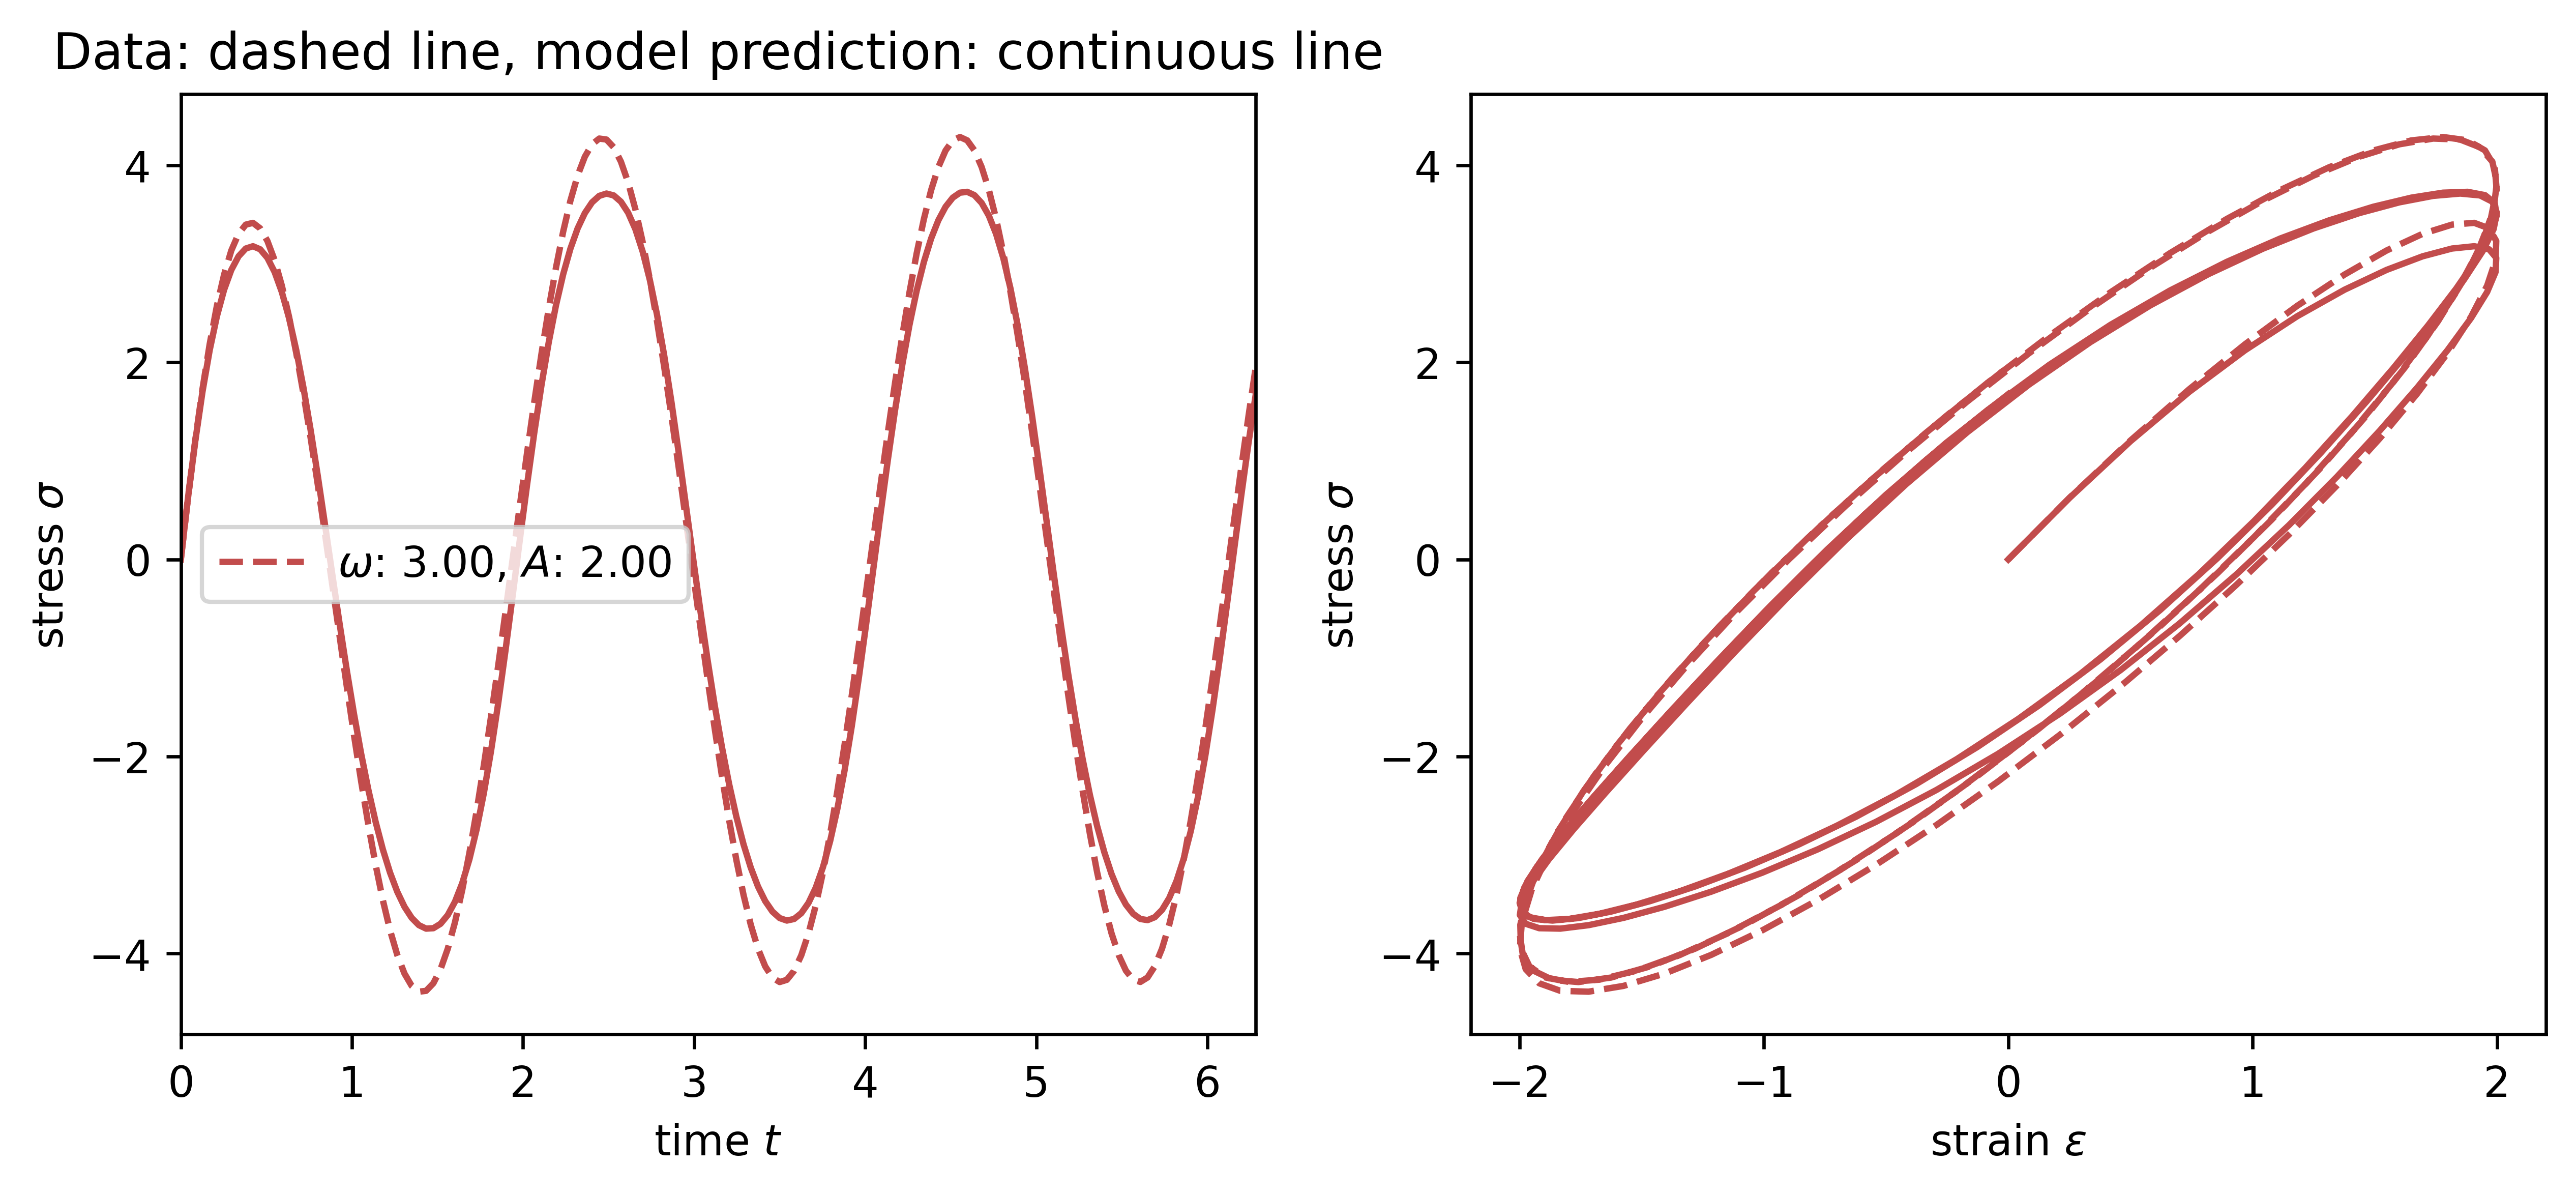

1/1 [==============================] - 0s 24ms/step


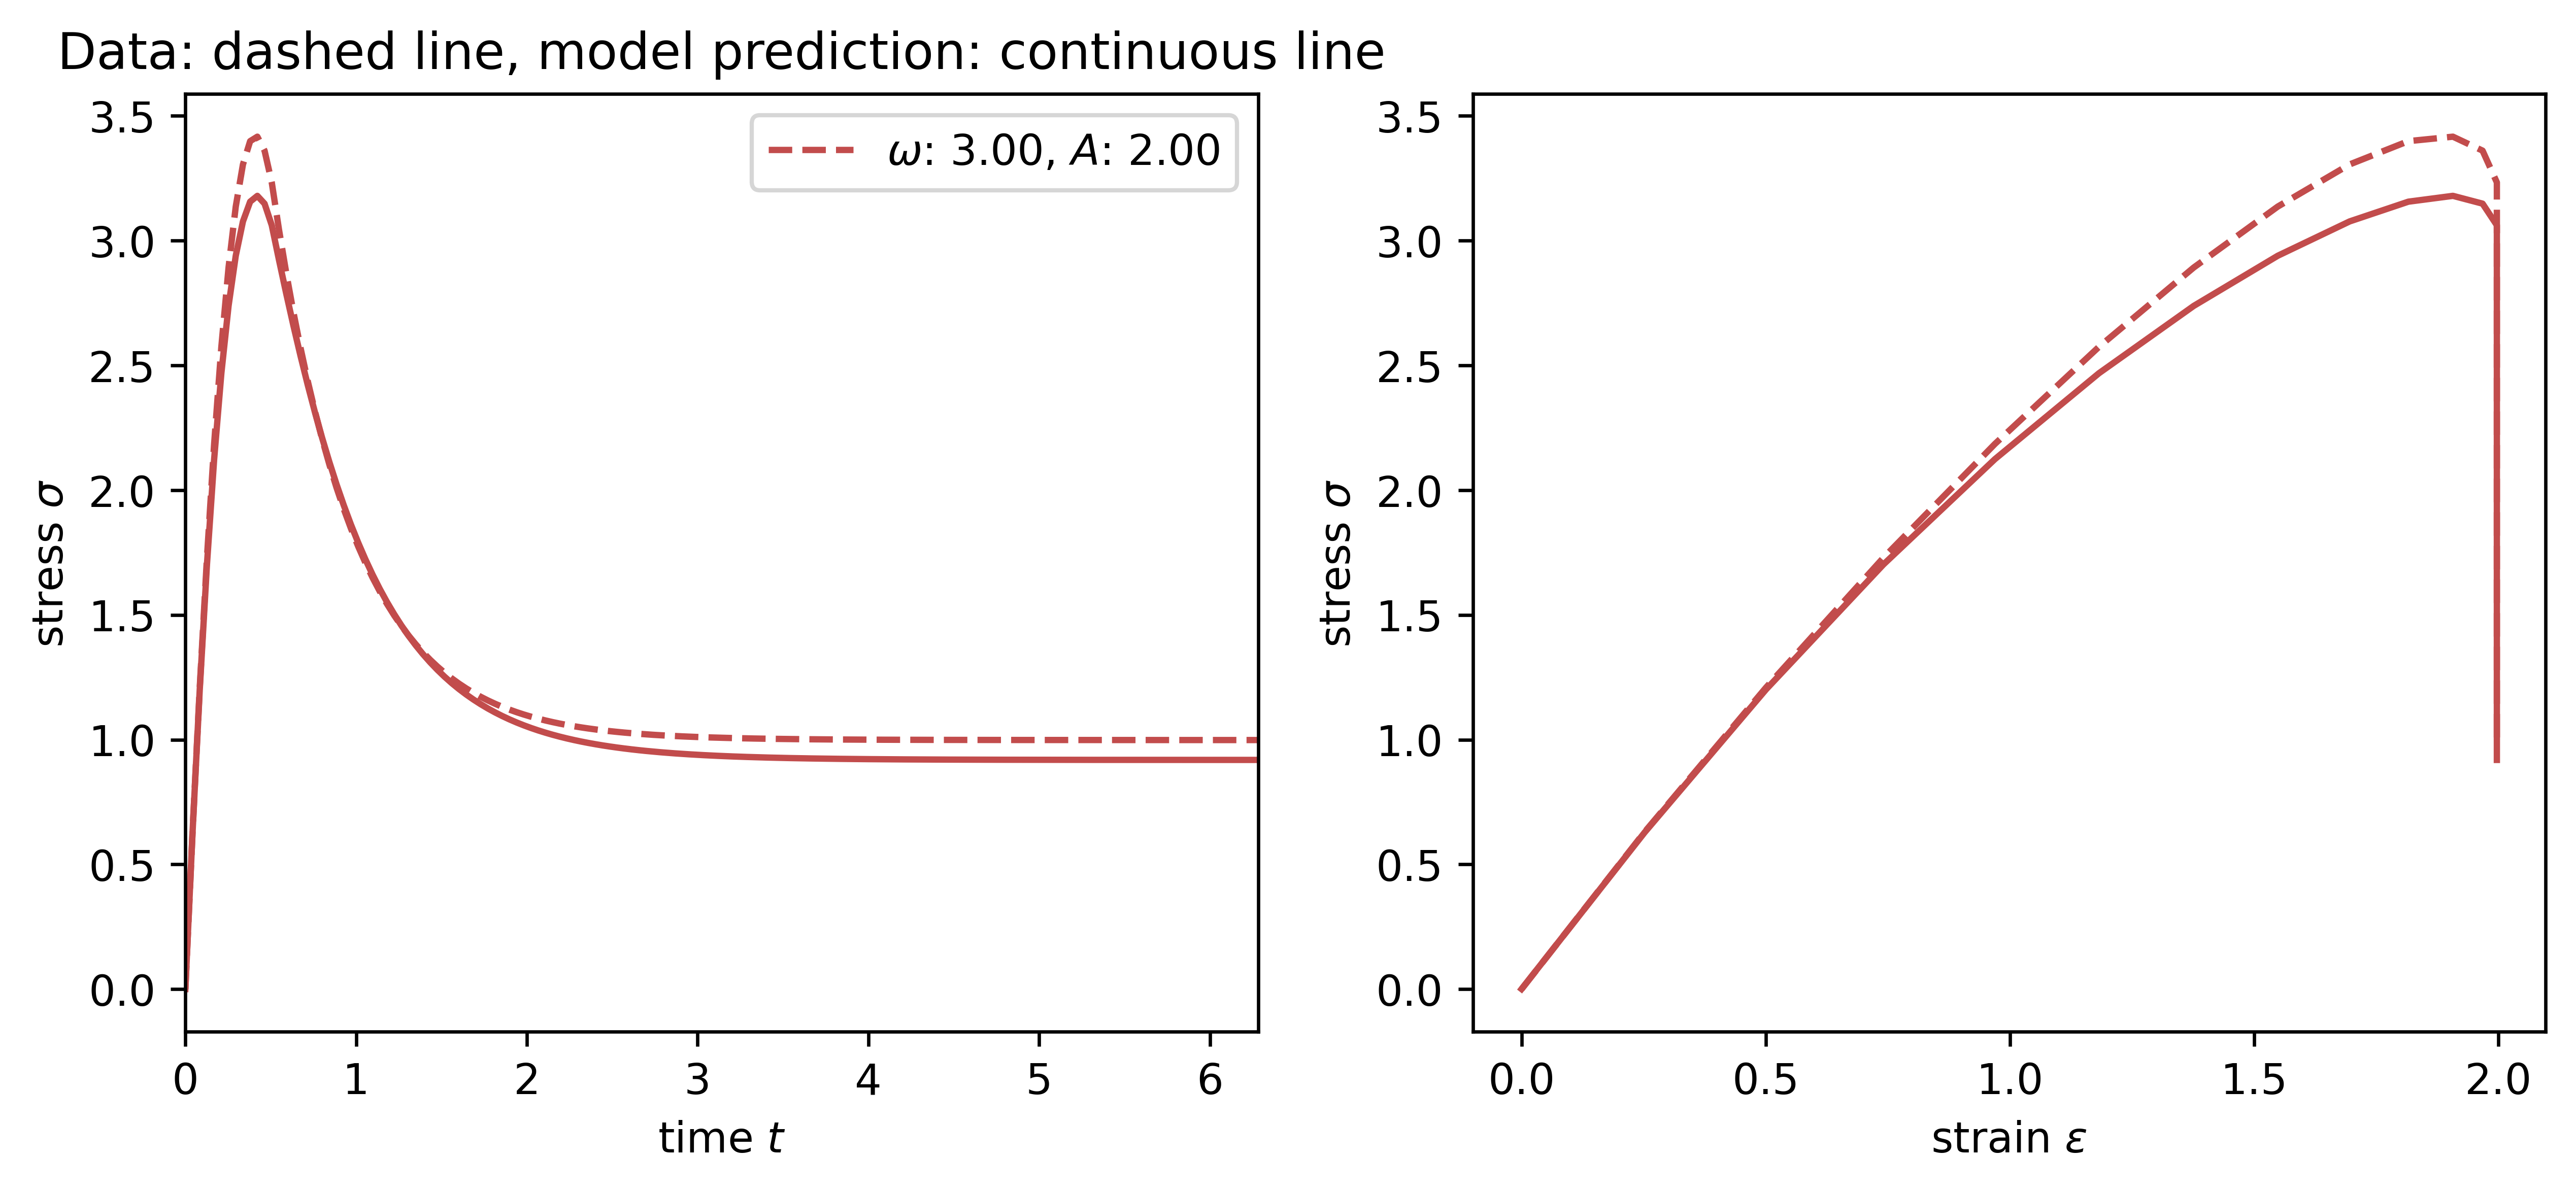

In [3]:
As = [2]
omegas = [3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

2025-02-03 09:12:01.770049
Epoch 1/5000
1/1 - 3s - loss: 8.6627 - mae: 2.6277 - 3s/epoch - 3s/step
Epoch 2/5000
1/1 - 0s - loss: 8.6446 - mae: 2.6250 - 48ms/epoch - 48ms/step
Epoch 3/5000
1/1 - 0s - loss: 8.6265 - mae: 2.6224 - 45ms/epoch - 45ms/step
Epoch 4/5000
1/1 - 0s - loss: 8.6084 - mae: 2.6197 - 43ms/epoch - 43ms/step
Epoch 5/5000
1/1 - 0s - loss: 8.5902 - mae: 2.6170 - 41ms/epoch - 41ms/step
Epoch 6/5000
1/1 - 0s - loss: 8.5718 - mae: 2.6143 - 43ms/epoch - 43ms/step
Epoch 7/5000
1/1 - 0s - loss: 8.5534 - mae: 2.6115 - 42ms/epoch - 42ms/step
Epoch 8/5000
1/1 - 0s - loss: 8.5347 - mae: 2.6087 - 42ms/epoch - 42ms/step
Epoch 9/5000
1/1 - 0s - loss: 8.5159 - mae: 2.6059 - 42ms/epoch - 42ms/step
Epoch 10/5000
1/1 - 0s - loss: 8.4968 - mae: 2.6030 - 50ms/epoch - 50ms/step
Epoch 11/5000
1/1 - 0s - loss: 8.4774 - mae: 2.6000 - 43ms/epoch - 43ms/step
Epoch 12/5000
1/1 - 0s - loss: 8.4578 - mae: 2.5970 - 41ms/epoch - 41ms/step
Epoch 13/5000
1/1 - 0s - loss: 8.4378 - mae: 2.5940 - 42ms/epo

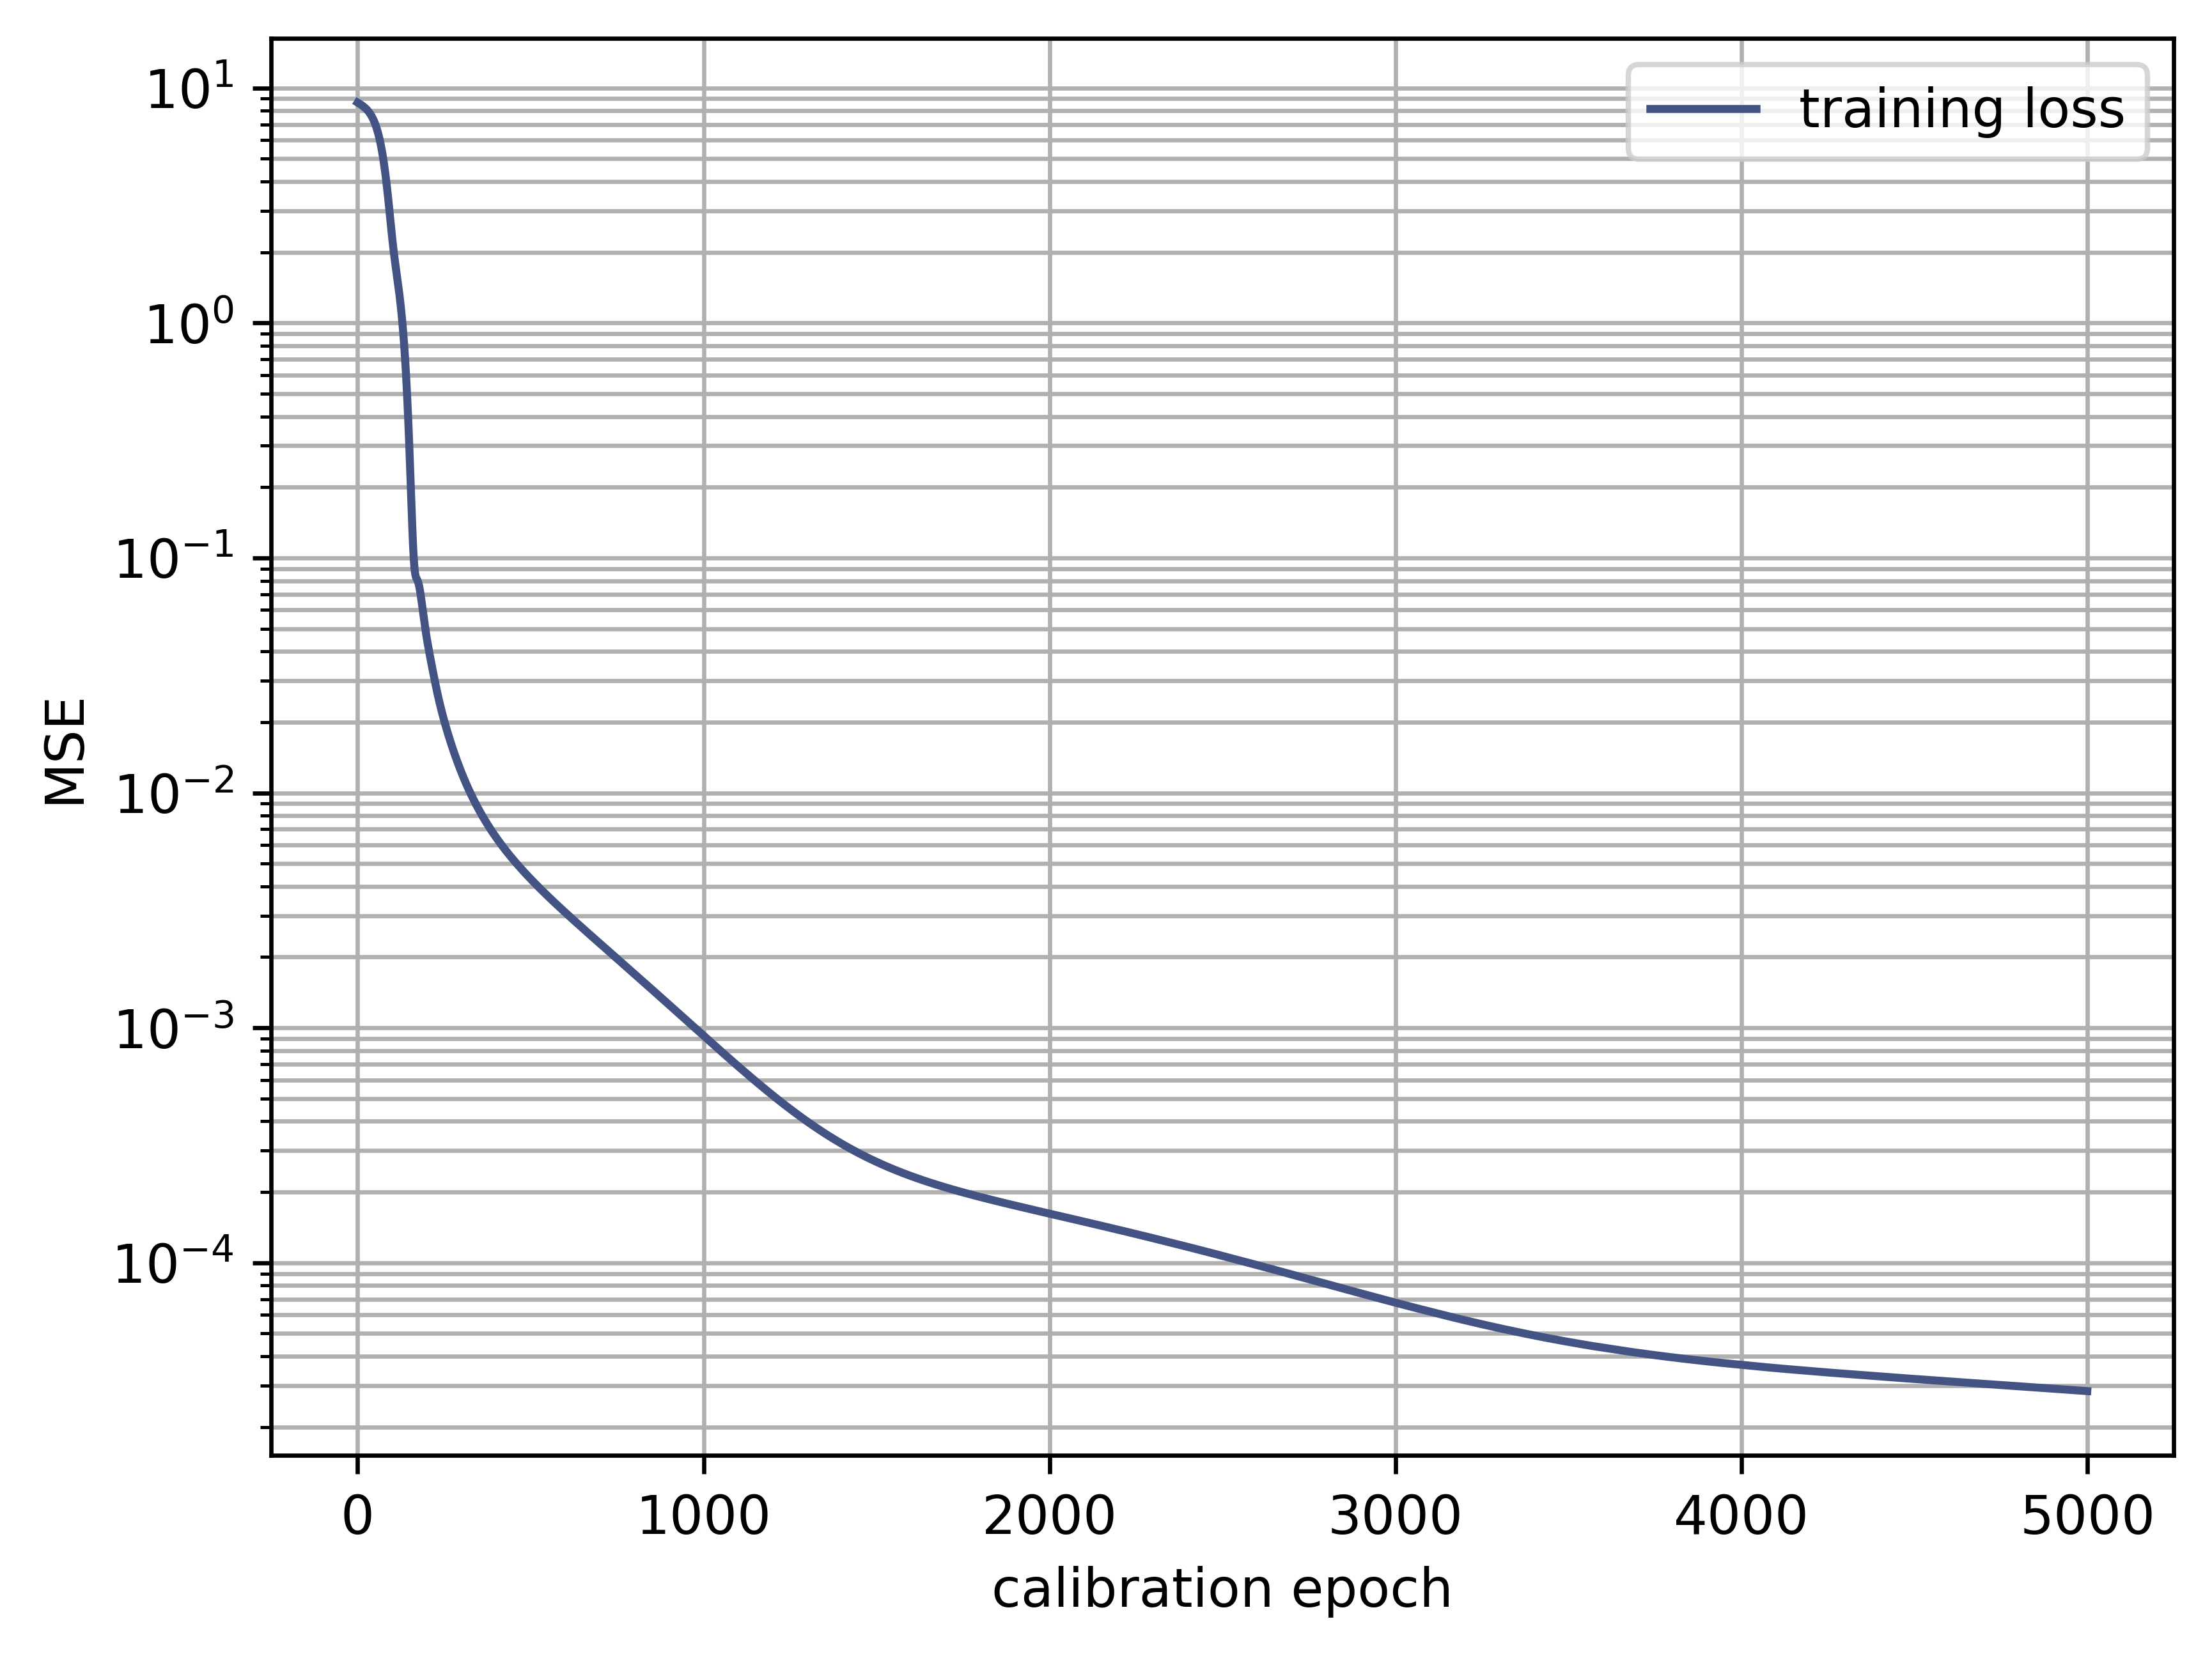

In [2]:
"""
Tutorial Machine Learning in Solid Mechanics (WiSe 23/24)
Task 4: Viscoelasticity
==================
Authors: Dominik K. Klein
         
01/2024
"""


# %%   
"""
Import modules

"""
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

# %% Own modules
import data as ld
import plots as lp
import gsm as hc2


# %%   
"""
Load and visualize data

"""


E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [3]
As = [2]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

#lp.plot_data(eps, eps_dot, sig, omegas, As)



# %%   
"""
Load and evaluate model

"""

model3 = hc2.main()
t1 = now()
print(t1)

h = model3.fit([eps, dts], [sig], epochs = 5000,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()




1/1 [==============================] - 0s 394ms/step


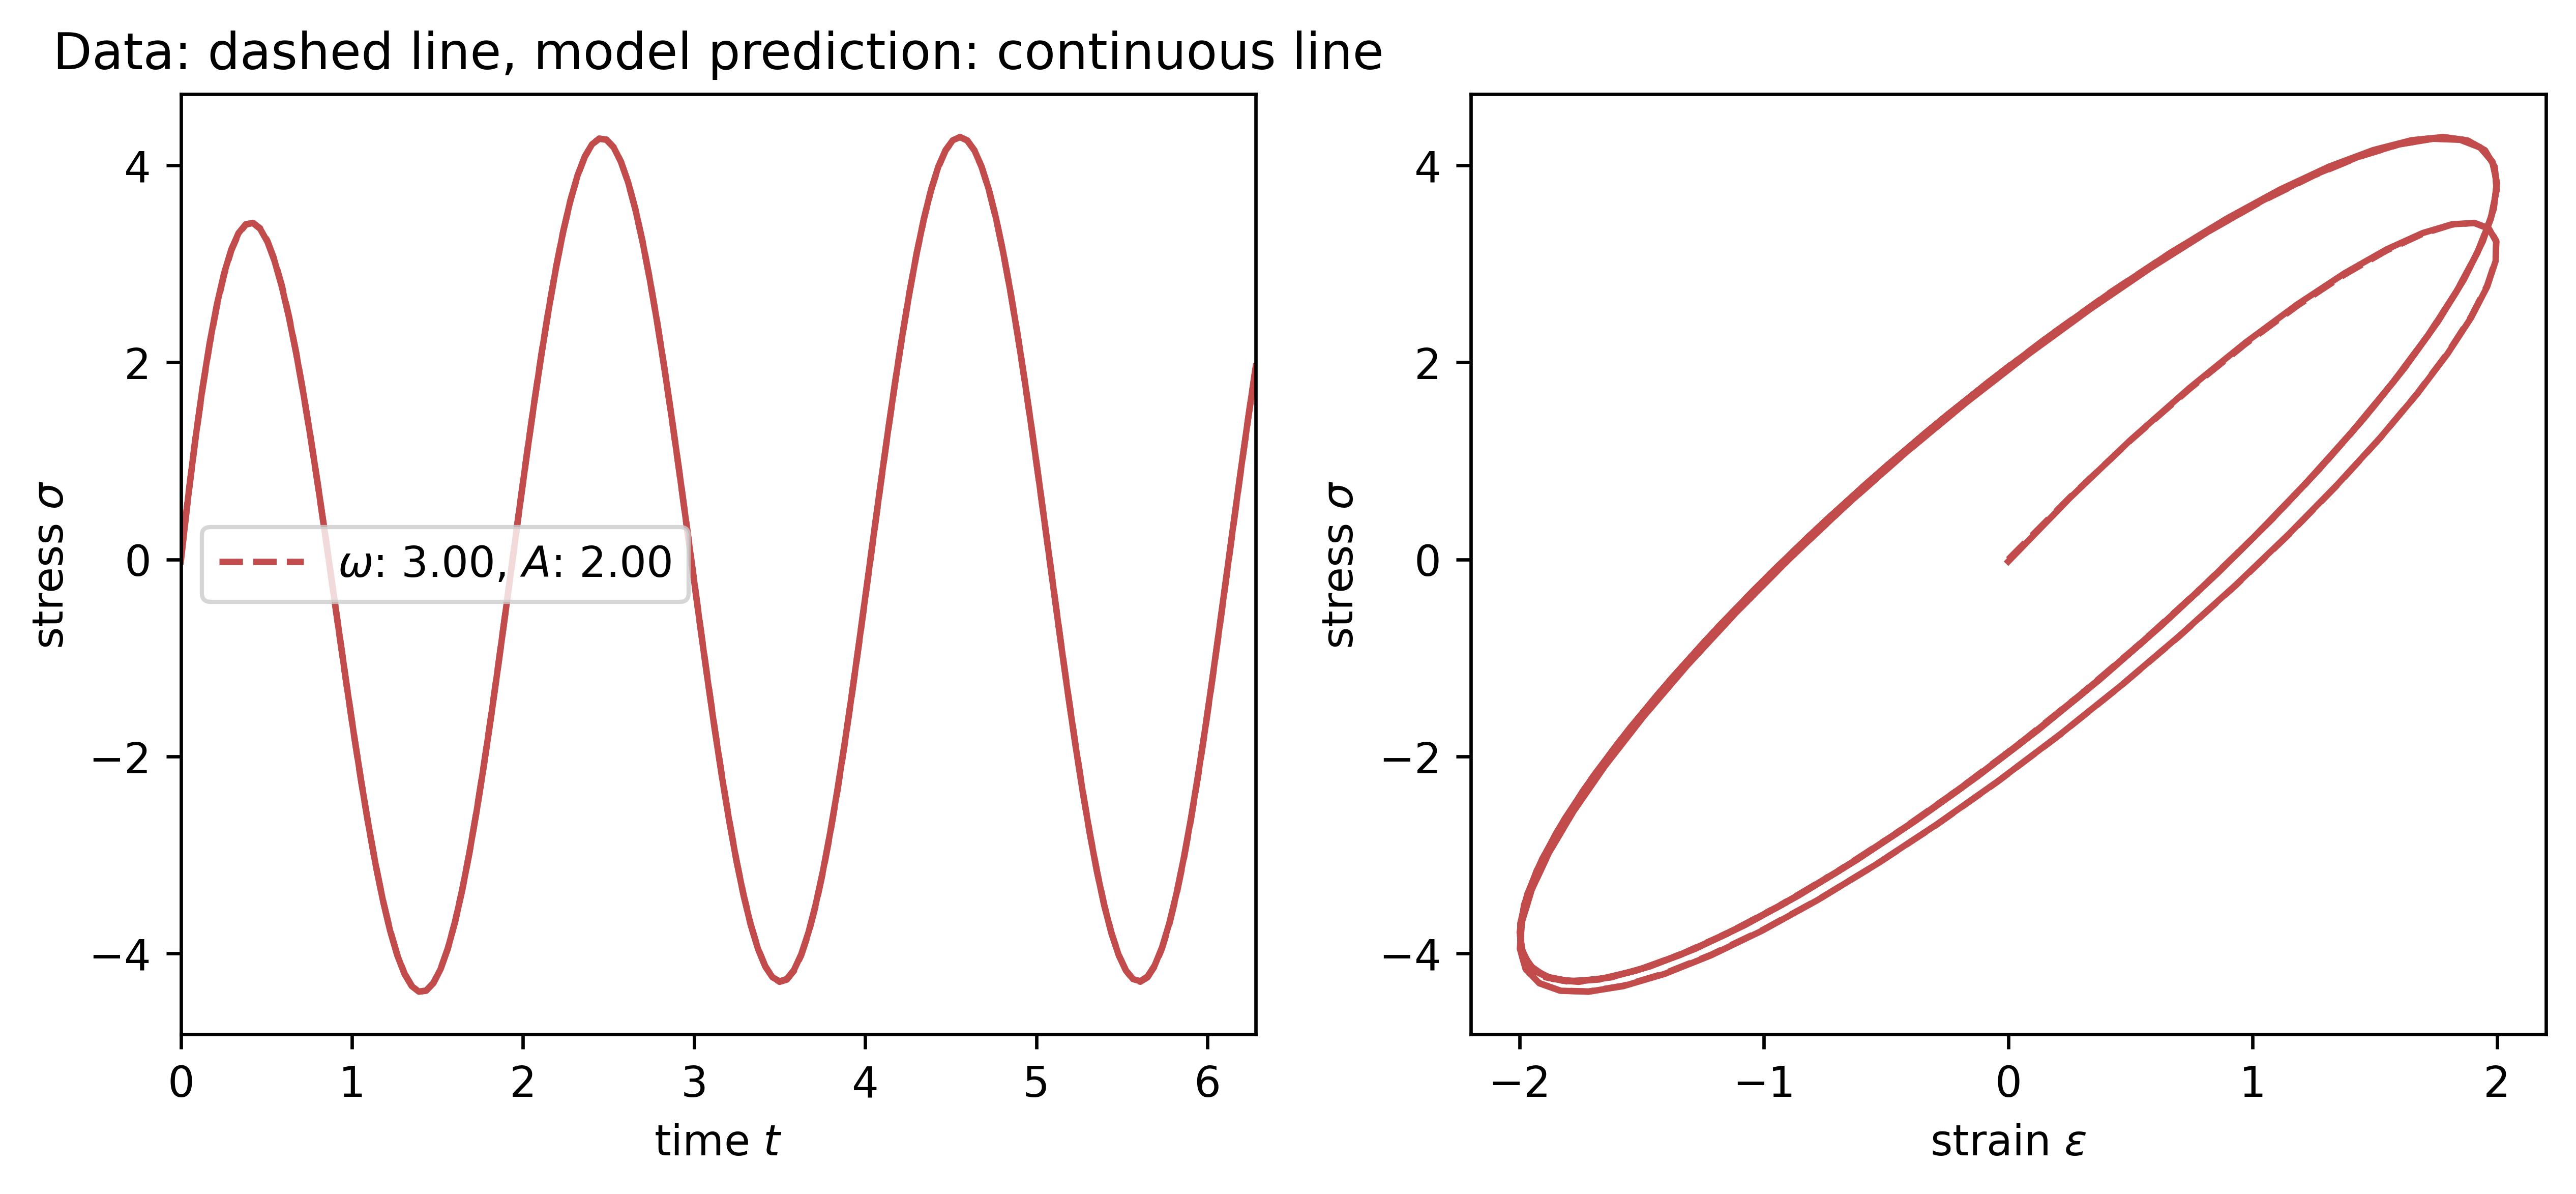

In [4]:
n = 150
eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model3.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


1/1 [==============================] - 0s 31ms/step


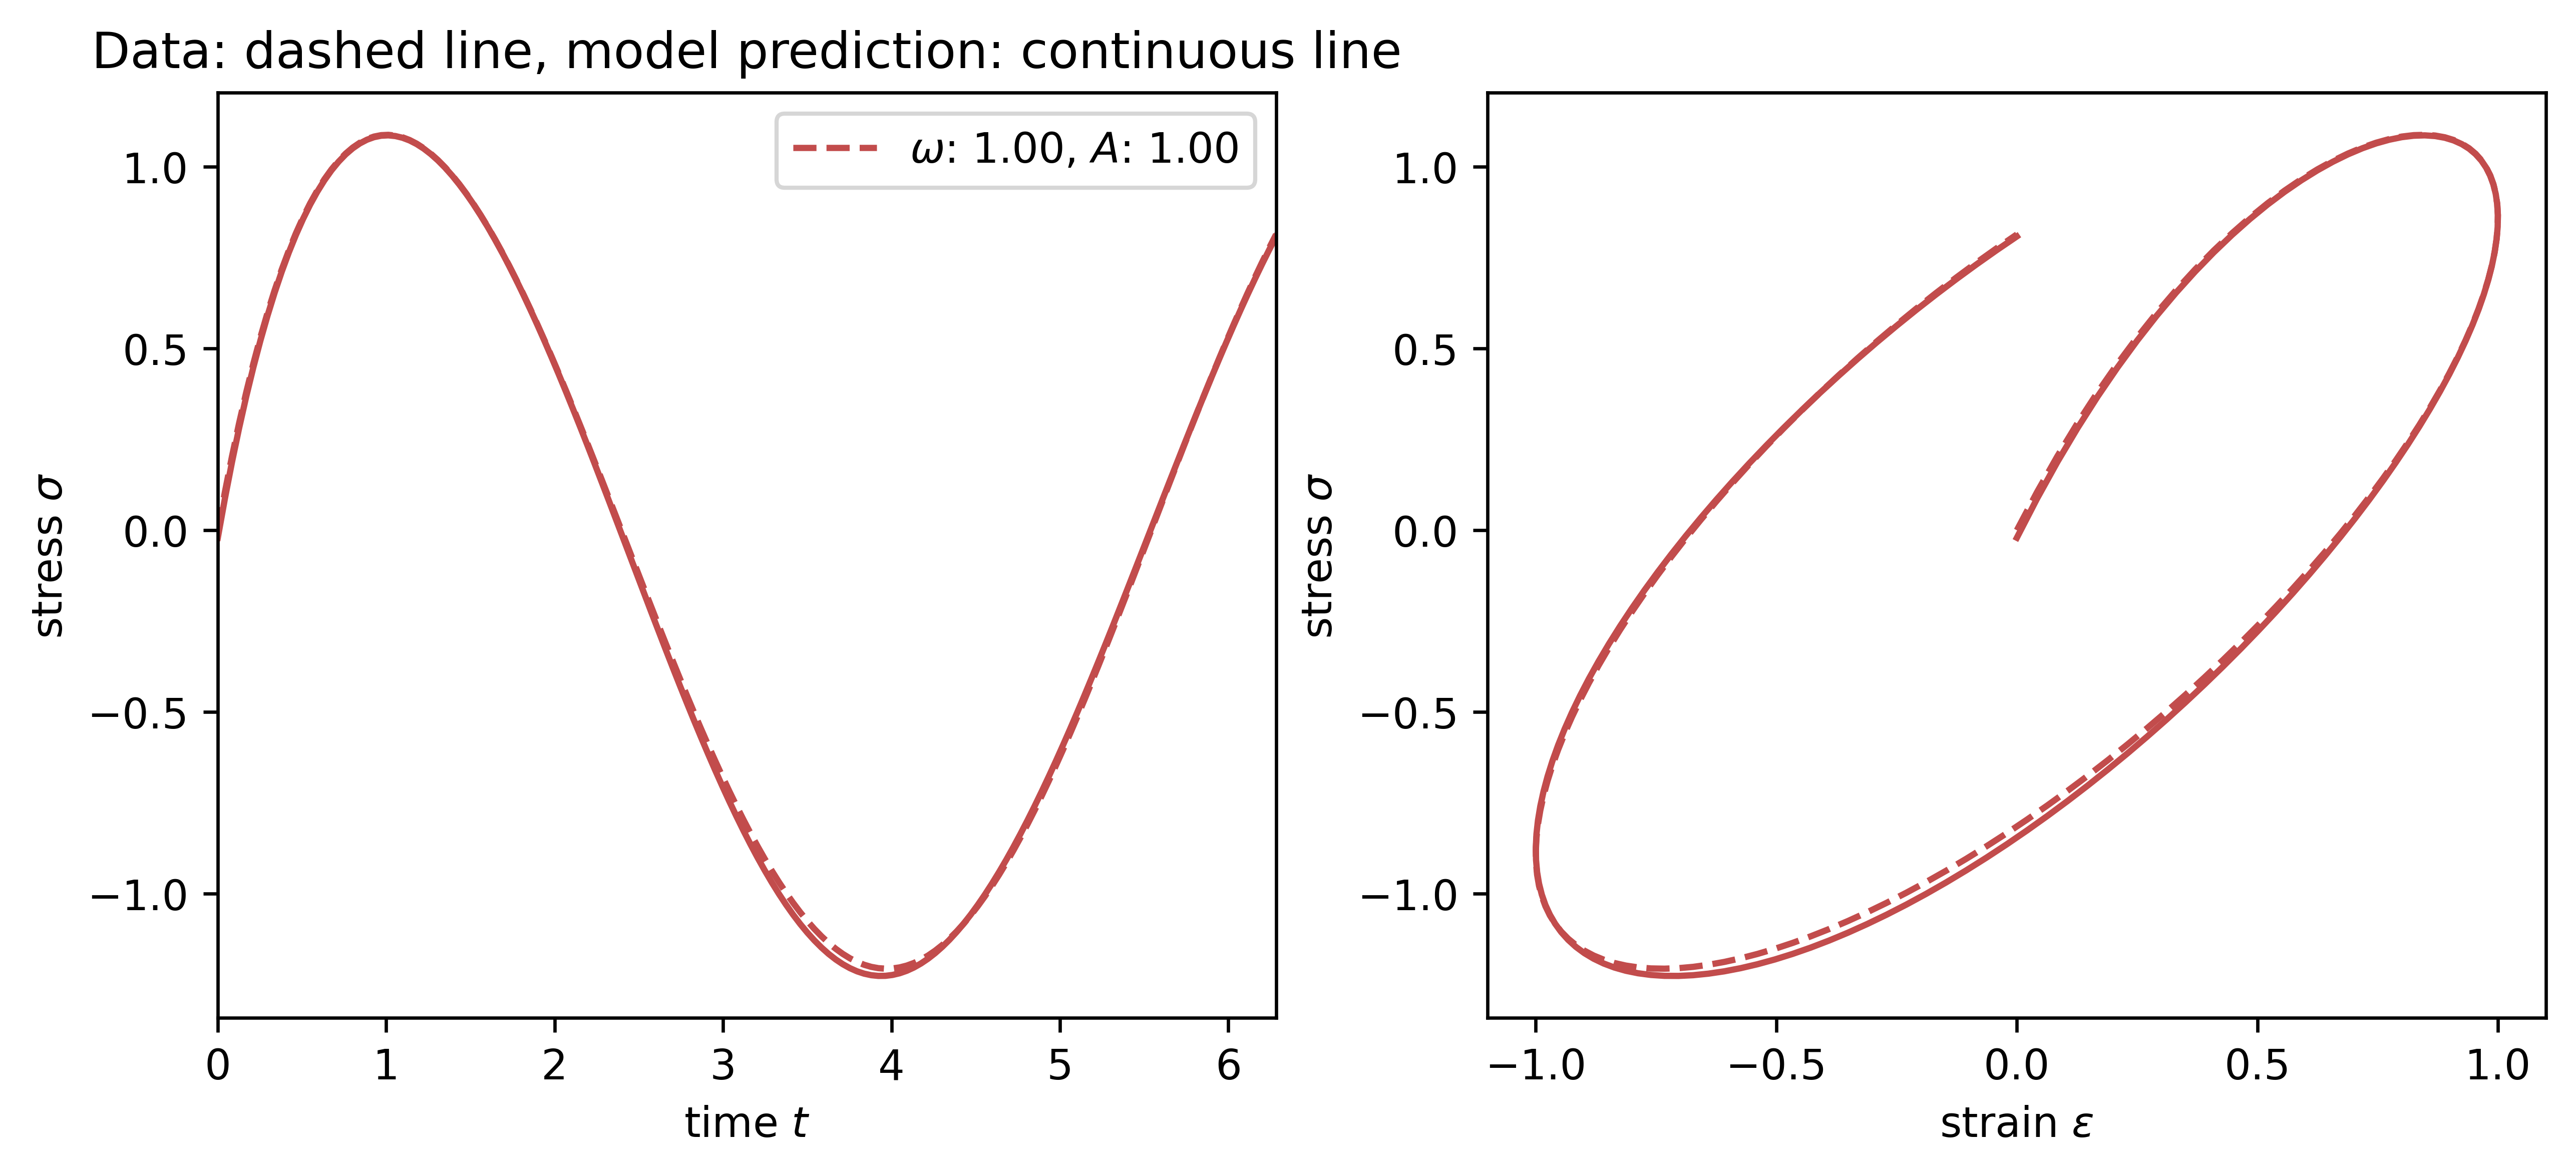

1/1 [==============================] - 0s 45ms/step


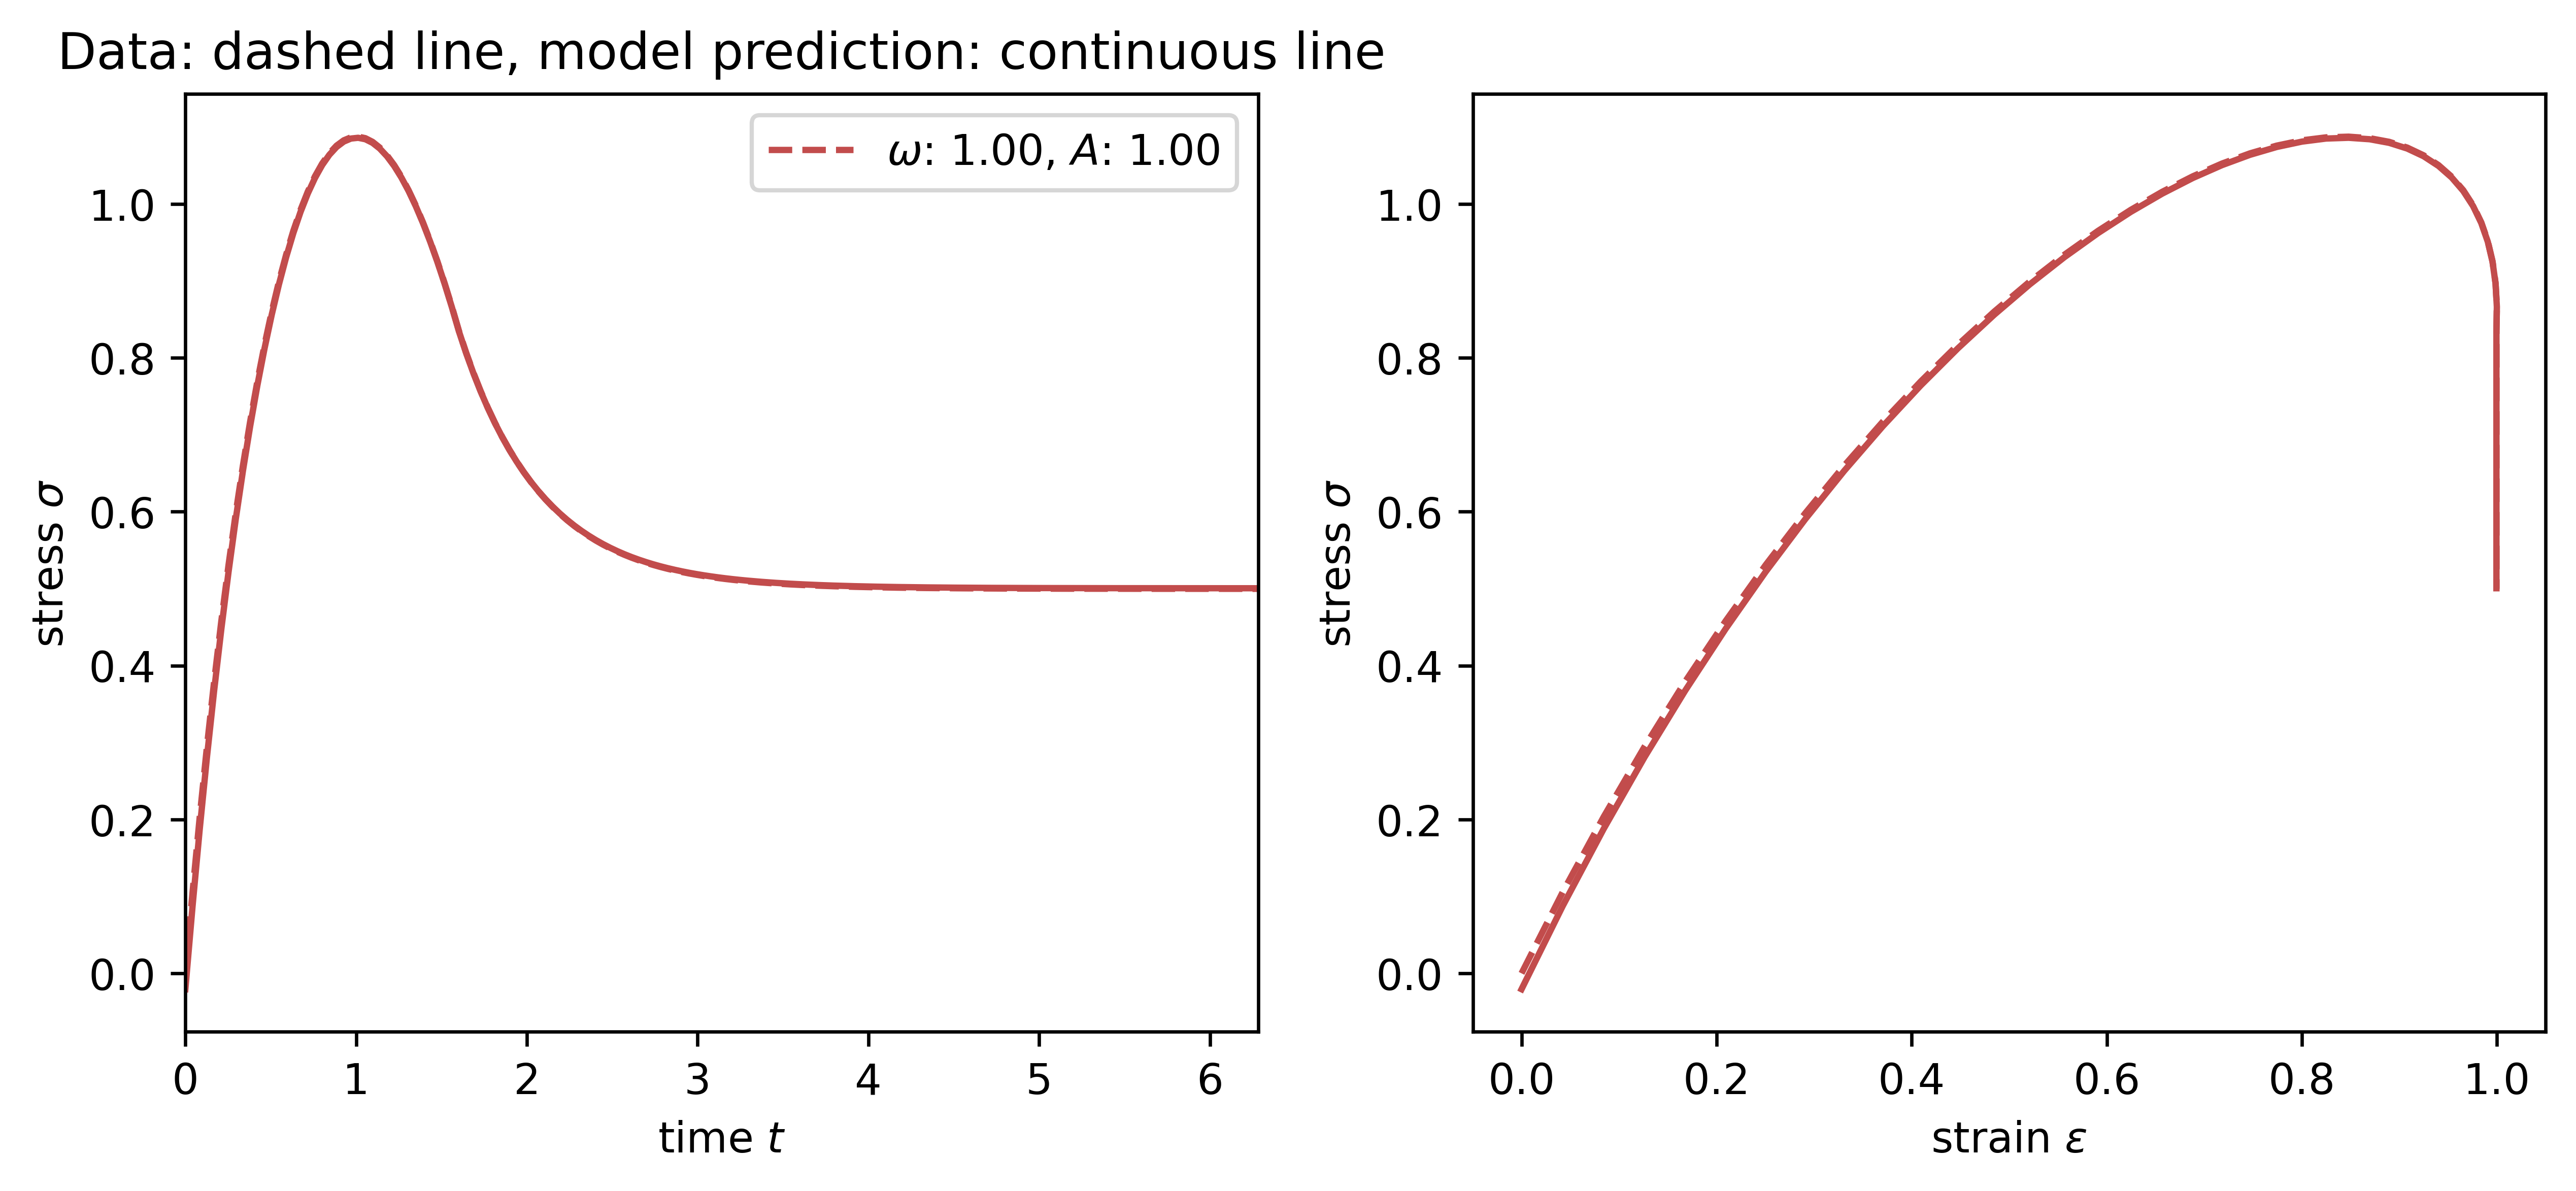

In [8]:
As = [1]
omegas = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model3.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model3.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

2025-02-03 14:31:08.536823
Epoch 1/5000
1/1 - 3s - loss: 5.9840 - mae: 2.1782 - 3s/epoch - 3s/step
Epoch 2/5000
1/1 - 0s - loss: 5.9759 - mae: 2.1767 - 44ms/epoch - 44ms/step
Epoch 3/5000
1/1 - 0s - loss: 5.9676 - mae: 2.1751 - 40ms/epoch - 40ms/step
Epoch 4/5000
1/1 - 0s - loss: 5.9591 - mae: 2.1734 - 38ms/epoch - 38ms/step
Epoch 5/5000
1/1 - 0s - loss: 5.9503 - mae: 2.1717 - 39ms/epoch - 39ms/step
Epoch 6/5000
1/1 - 0s - loss: 5.9413 - mae: 2.1700 - 41ms/epoch - 41ms/step
Epoch 7/5000
1/1 - 0s - loss: 5.9321 - mae: 2.1682 - 39ms/epoch - 39ms/step
Epoch 8/5000
1/1 - 0s - loss: 5.9226 - mae: 2.1663 - 42ms/epoch - 42ms/step
Epoch 9/5000
1/1 - 0s - loss: 5.9127 - mae: 2.1644 - 40ms/epoch - 40ms/step
Epoch 10/5000
1/1 - 0s - loss: 5.9026 - mae: 2.1624 - 40ms/epoch - 40ms/step
Epoch 11/5000
1/1 - 0s - loss: 5.8922 - mae: 2.1604 - 40ms/epoch - 40ms/step
Epoch 12/5000
1/1 - 0s - loss: 5.8815 - mae: 2.1582 - 41ms/epoch - 41ms/step
Epoch 13/5000
1/1 - 0s - loss: 5.8704 - mae: 2.1560 - 41ms/epo

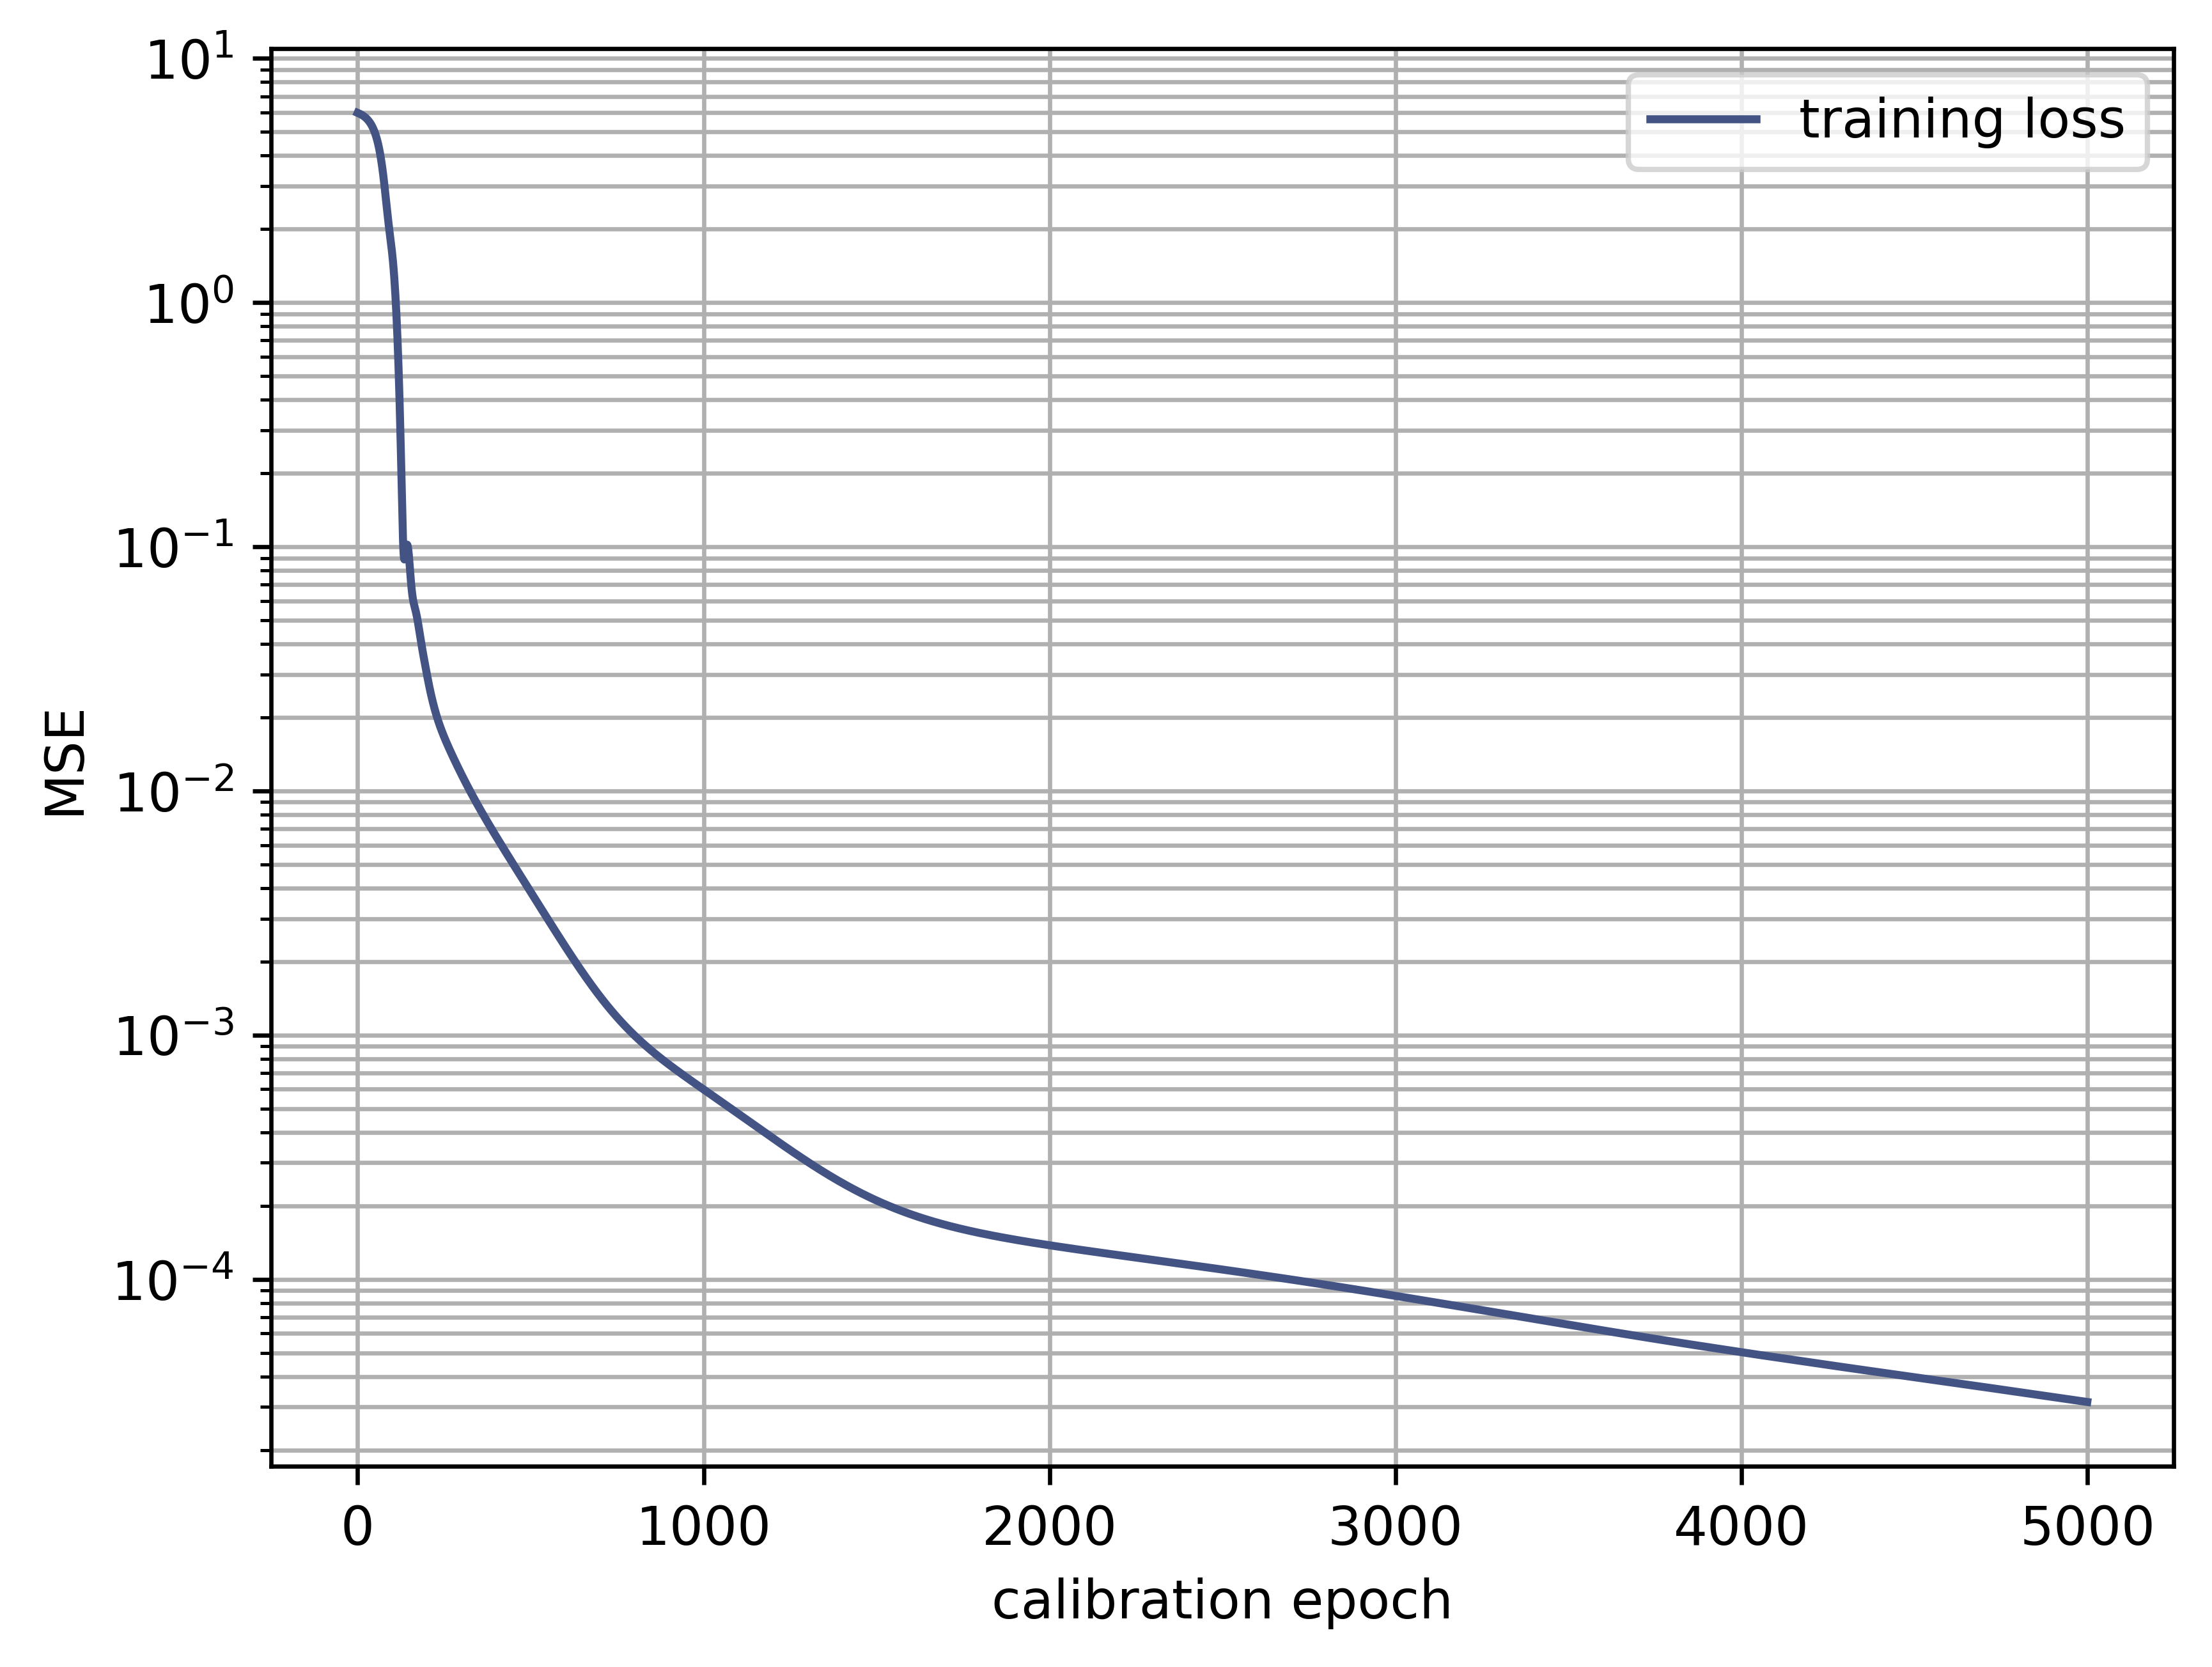

In [1]:
"""
Tutorial Machine Learning in Solid Mechanics (WiSe 23/24)
Task 4: Viscoelasticity
==================
Authors: Dominik K. Klein
         
01/2024
"""


# %%   
"""
Import modules

"""
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

# %% Own modules
import data as ld
import plots as lp
import gsm as hc2


# %%   
"""
Load and visualize data

"""


E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [2]
As = [2]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

#lp.plot_data(eps, eps_dot, sig, omegas, As)



# %%   
"""
Load and evaluate model

"""

model2 = hc2.main()
t1 = now()
print(t1)

h = model2.fit([eps, dts], [sig], epochs = 5000,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()




1/1 [==============================] - 0s 28ms/step


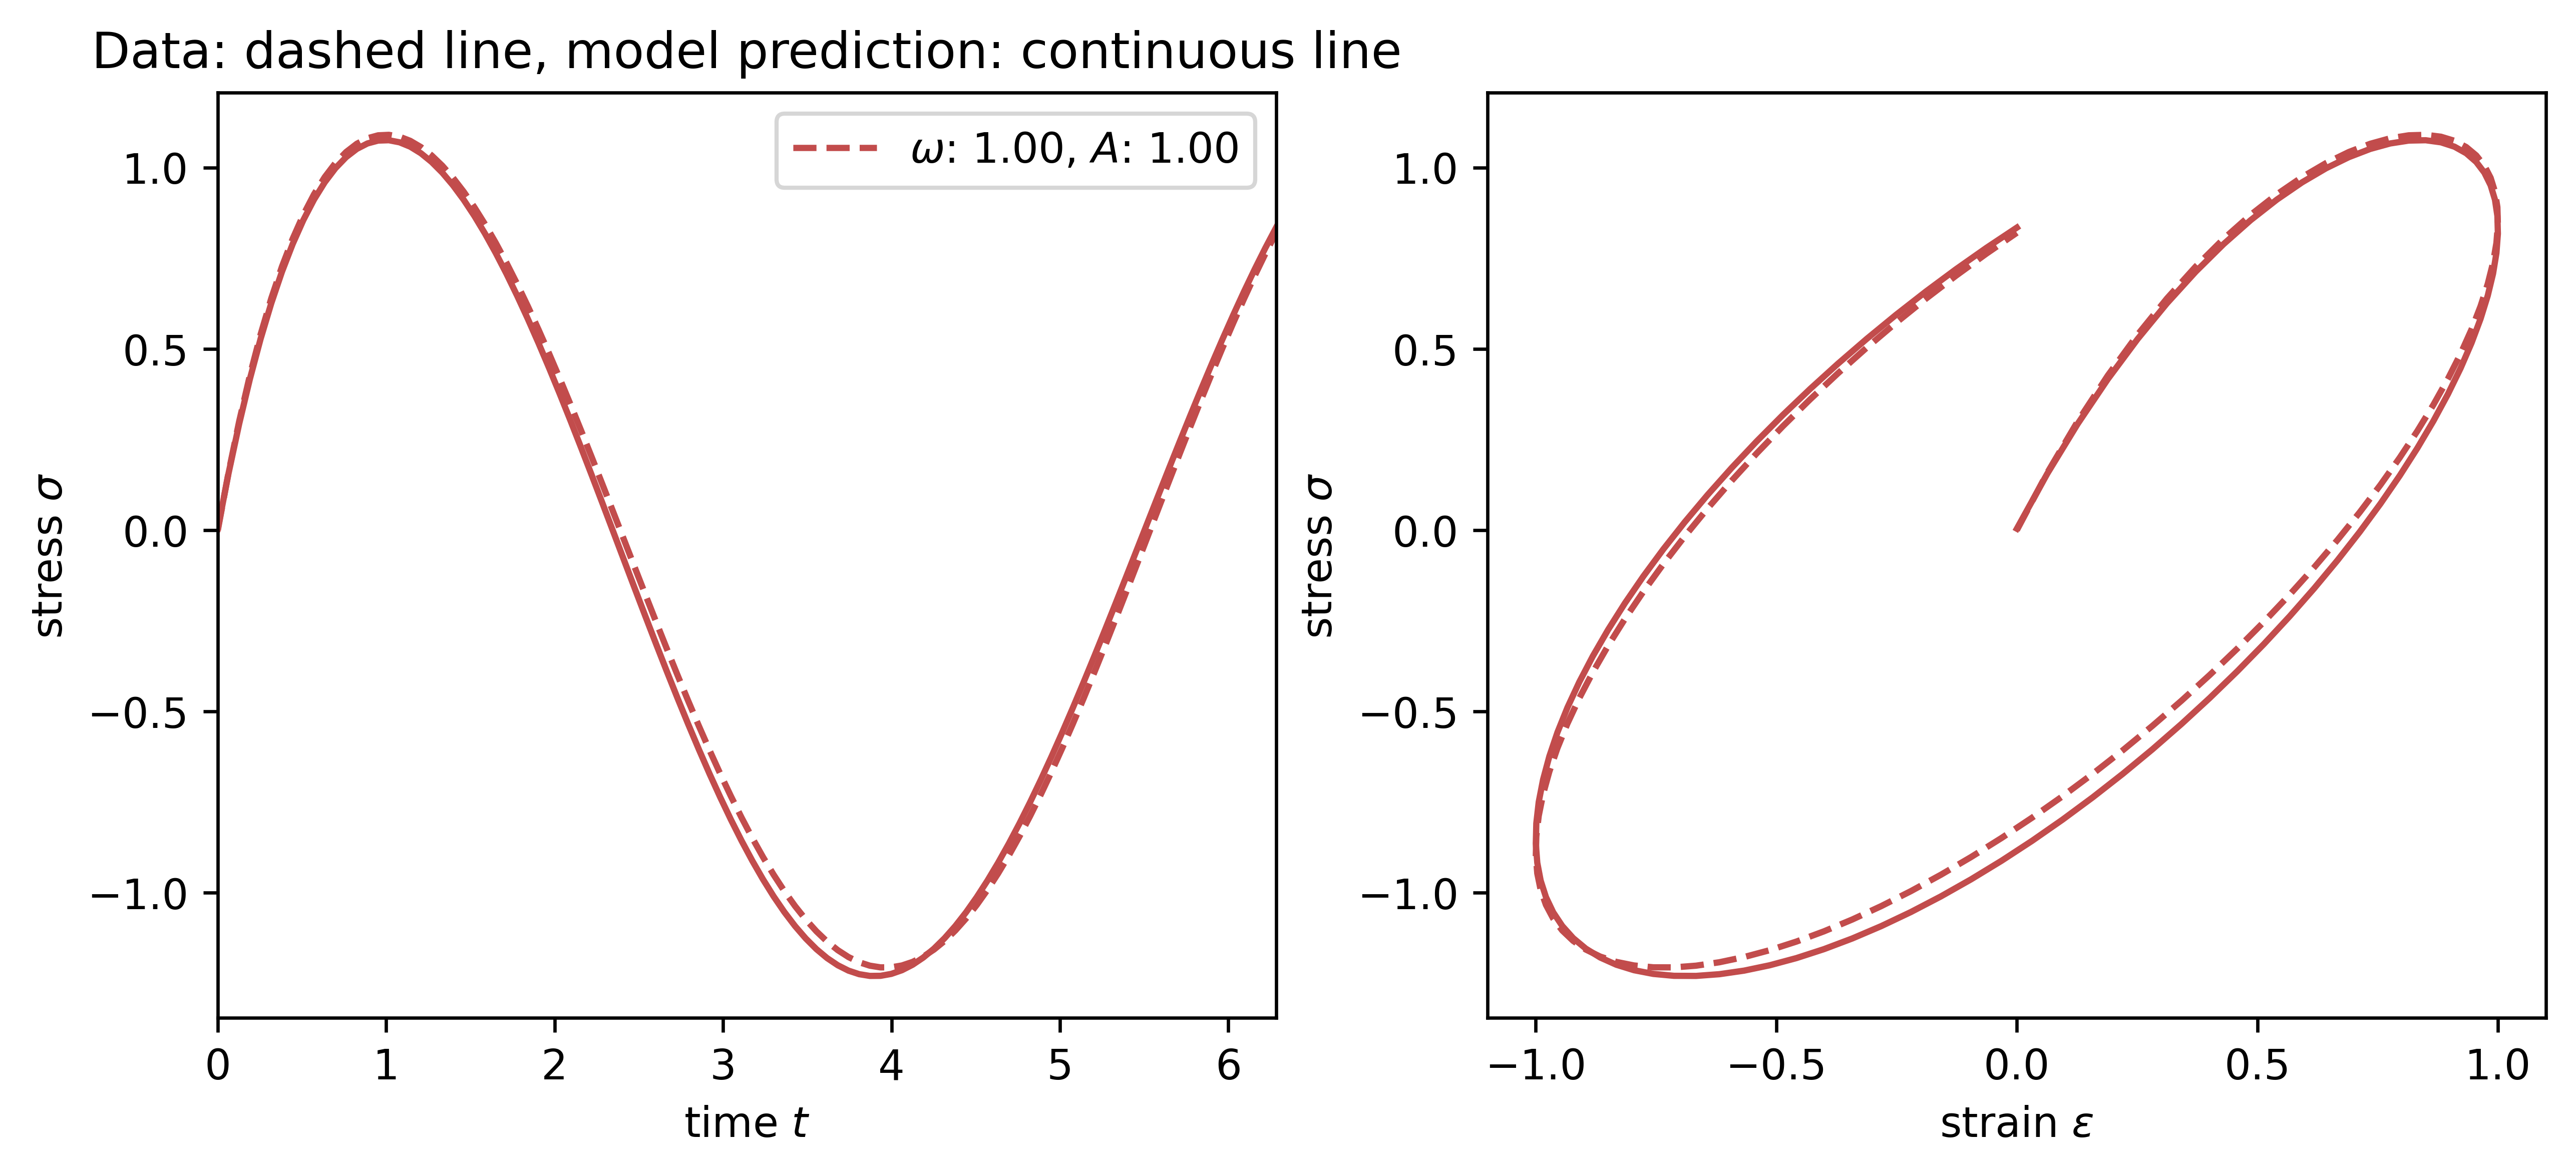

1/1 [==============================] - 0s 32ms/step


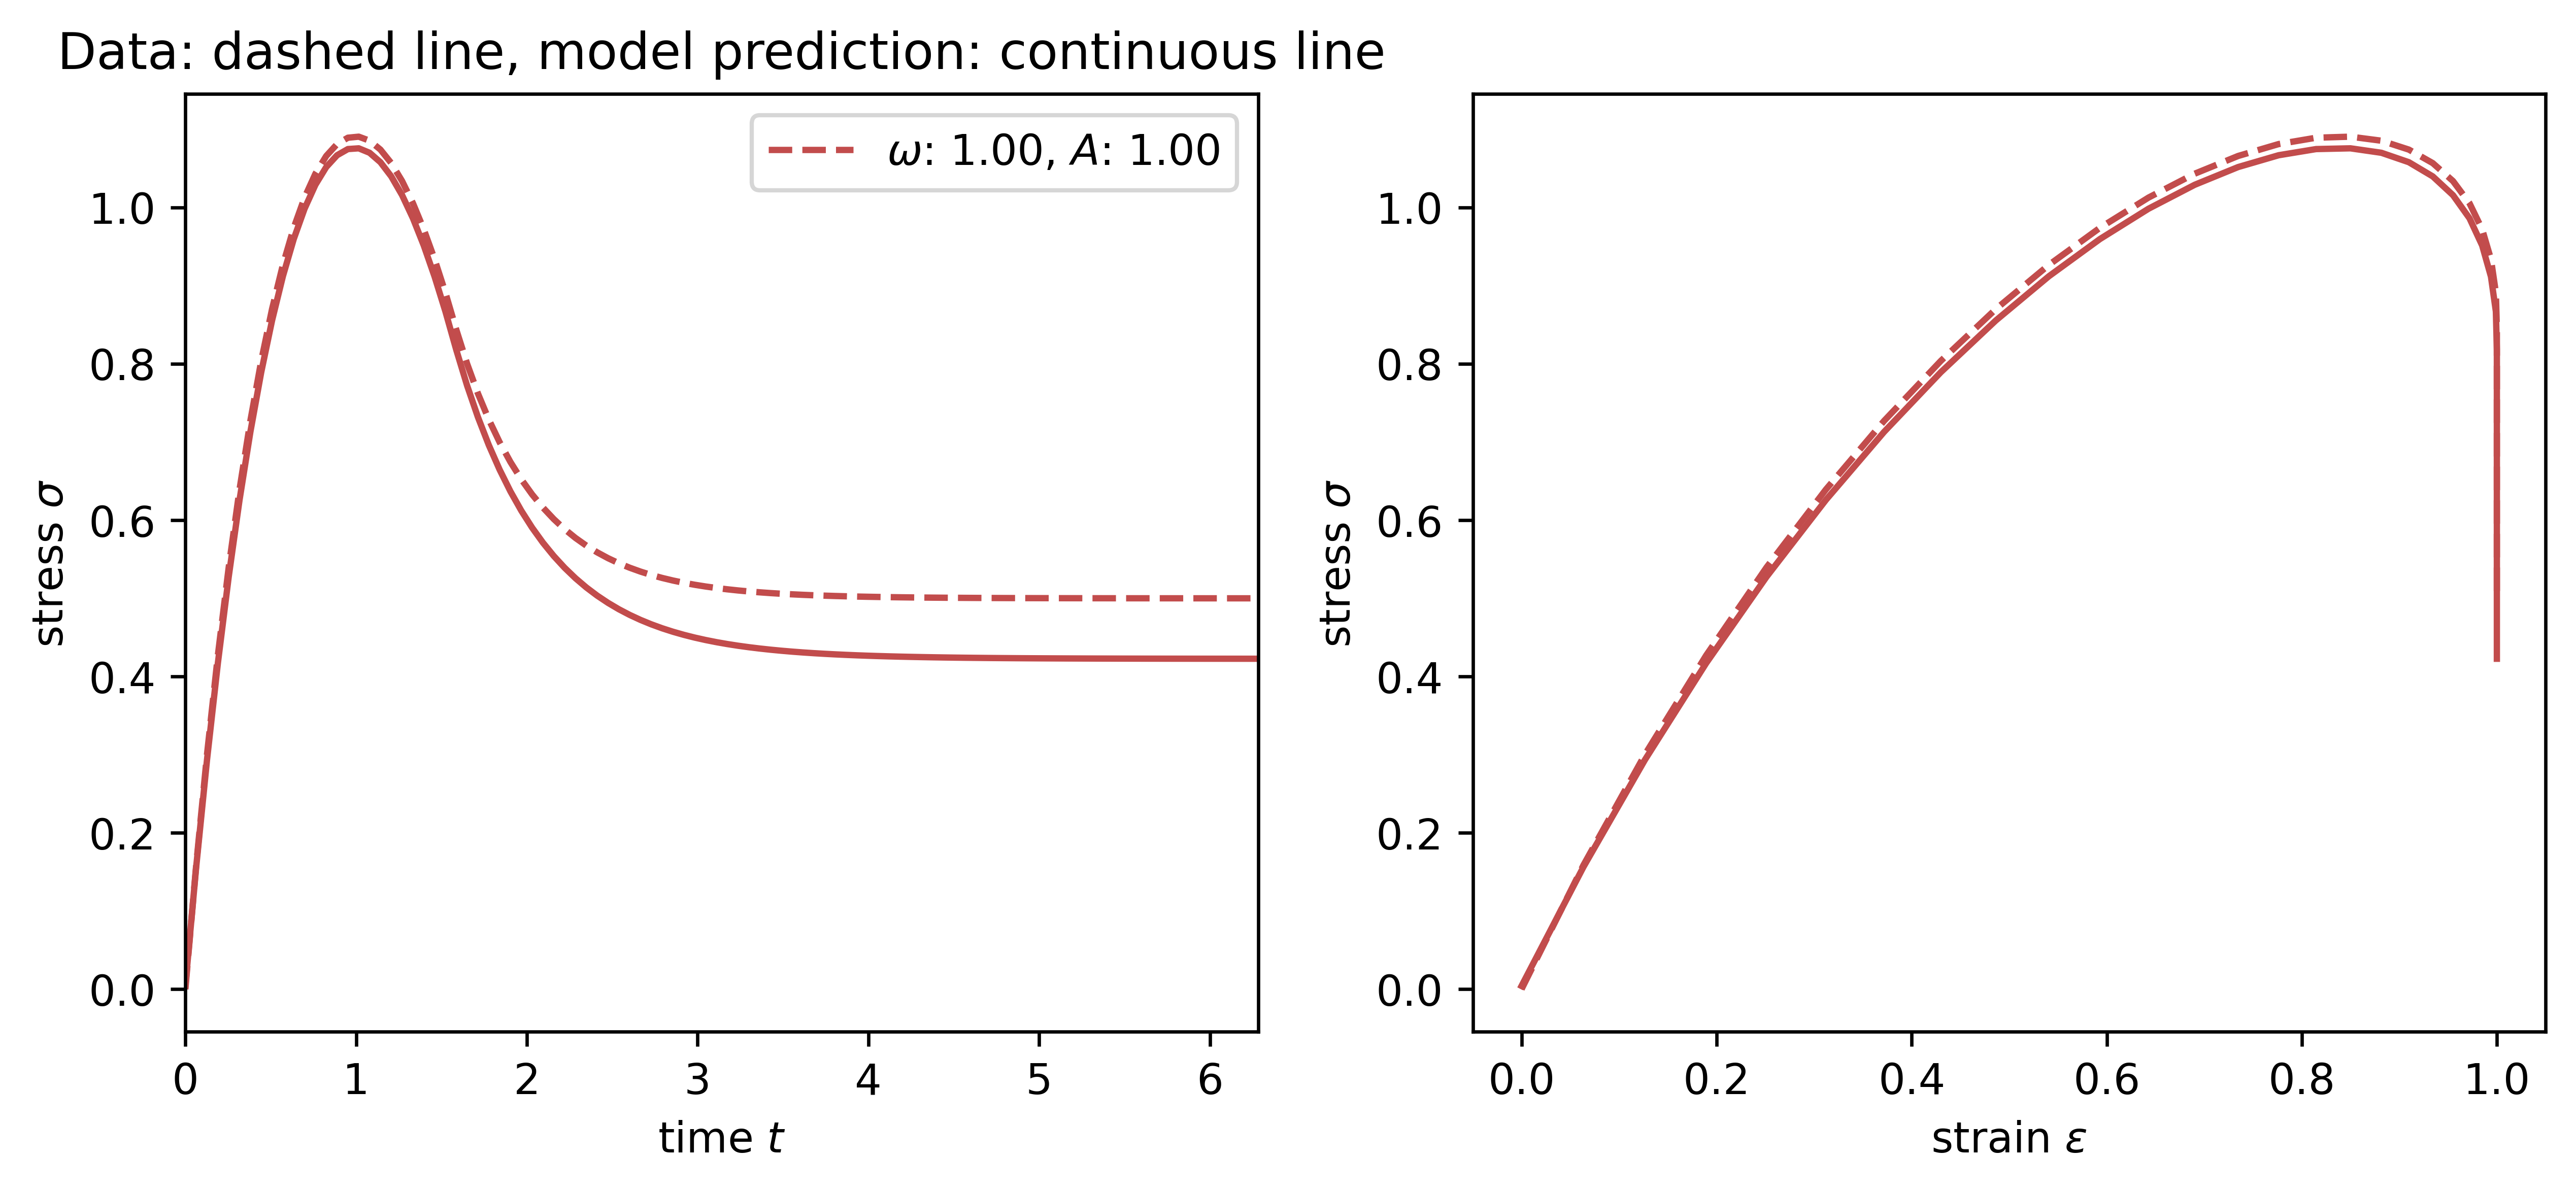

In [4]:
As = [1]
omegas = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

In [5]:
model2.save('gsm.h5')

NotImplementedError: 
Layer GSMRNNCellWithFFNN has arguments ['g']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config